In [64]:
import MetaTrader5 as mt5
import pycaret
from pycaret.classification import *
import datetime
from datetime import timedelta
import numpy as np
import pandas as pd


from statsmodels.graphics.tsaplots import plot_acf,plot_pacf 
from statsmodels.tsa.seasonal import seasonal_decompose 
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller
import numpy as np
import pandas as pd
from statsmodels.regression.linear_model import OLS
from statsmodels.tools.tools import add_constant
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt                    

import warnings
import matplotlib.pyplot as plt
#importing required libraries
from sklearn.preprocessing import MinMaxScaler
warnings.filterwarnings("ignore")

In [65]:
def plot_prediction(real, prediccion):
    plt.plot(real,color='red', label='Valor real de la acción')
    plt.plot(prediccion, color='blue', label='Predicción de la acción')
    plt.ylim(1.1 * np.min(prediccion)/2, 1.1 * np.max(prediccion))
    plt.xlabel('Tiempo')
    plt.ylabel('Valor de la acción')
    plt.legend()
    plt.show()

In [66]:
import os

# Obtener la ruta del directorio del notebook actual
directorio_actual = os.getcwd()

# Obtener el nombre de la carpeta del directorio actual
nombre_carpeta_actual = os.path.basename(directorio_actual)

print(nombre_carpeta_actual)

AUDUSD


In [67]:
# Inicializar MetaTrader 5
mt5.initialize()

# Definir el símbolo (par de divisas) y la temporalidad
symbol = nombre_carpeta_actual
timeframe = mt5.TIMEFRAME_D1
# Definir el período de tiempo deseado


# Obtener la fecha actual
#fecha_actual = datetime.datetime.now()
fecha_actual = datetime.datetime(2025, 1, 10) 
# Calcular la fecha de hace un año a partir de la fecha actual
start_date = fecha_actual - timedelta(days=1440)

# Definir end_date como la fecha actual
end_date = fecha_actual

# Convertir las fechas a objetos Timestamp de pandas
start_date = pd.Timestamp(start_date)
end_date = pd.Timestamp(end_date)

# Obtener datos históricos
historical_data = mt5.copy_rates_range(symbol, timeframe, start_date, end_date)

# Cerrar la conexión a MetaTrader 5
mt5.shutdown()

# Crear un DataFrame de pandas con los datos históricos
df0 = pd.DataFrame(historical_data)

# Convertir las marcas de tiempo en formato legible
#df['time'] = pd.to_datetime(df['time'], unit='s')
#data = df.set_index('time')
df0['time'] = pd.to_datetime(df0['time'], unit='s')

In [68]:
# Extraer los componentes de fecha y hora
df0['hour'] = df0['time'].dt.hour
df0['day'] = df0['time'].dt.day
df0['month'] = df0['time'].dt.month
df0['year'] = df0['time'].dt.year

In [69]:
df=df0

In [70]:
df

time     open     high      low    close  tick_volume  spread  \
0    2021-02-01  0.76189  0.76626  0.76058  0.76205       104719       0   
1    2021-02-02  0.76195  0.76618  0.75638  0.76082        85910       0   
2    2021-02-03  0.76066  0.76265  0.76016  0.76205        71325       0   
3    2021-02-04  0.76179  0.76477  0.75882  0.75999        67096       0   
4    2021-02-05  0.75995  0.76787  0.75829  0.76775        63978       0   
...         ...      ...      ...      ...      ...          ...     ...   
1019 2025-01-03  0.61965  0.62253  0.61912  0.62140       113529       0   
1020 2025-01-06  0.62062  0.63022  0.62016  0.62452       180283       0   
1021 2025-01-07  0.62345  0.62881  0.62277  0.62304       141545       0   
1022 2025-01-08  0.62269  0.62421  0.61874  0.62157       153783       0   
1023 2025-01-09  0.62052  0.62157  0.61719  0.61959        64747       0   

      real_volume  hour  day  month  year  
0               0     0    1      2  2021  
1               0     0    2      2  2021  
2               0     0    3      2  2021  
3               0     0    4      2  2021  
4               0     0    5      2  2021  
...           ...   ...  ...    ...   ...  
1019            0     0    3      1  2025  
1020            0     0    6      1  2025  
1021            0     0    7      1  2025  
1022            0     0    8      1  2025  
1023            0     0    9      1  2025  

[1024 rows x 12 columns]

## PRUEBA DICKEY FULLER

In [71]:
prices = df['close']  # Columna de precios de cierre

# Aplicar el test de Dickey-Fuller aumentado (ADF)
result = adfuller(prices)

# Resultados del test
print('ADF Statistic:', result[0])
print('p-value:', result[1])
print('Critical Values:')
for key, value in result[4].items():
    print(f'{key}: {value}')

ADF Statistic: -1.5759179721892669
p-value: 0.49567838888363963
Critical Values:
1%: -3.4367709764382024
5%: -2.8643749513463637
10%: -2.568279452717228


Interpretación
ADF Statistic:

El valor estadístico de ADF es -1.4616. Este valor mide la diferencia entre la serie temporal y su propia media a lo largo del tiempo. Cuanto más negativo sea este valor, más evidencia hay en contra de la hipótesis nula de que la serie es no estacionaria.
p-value:

El p-value es 0.5524. Esto es la probabilidad de obtener una estadística de prueba tan extrema como la observada, bajo la hipótesis nula de que la serie temporal tiene una raíz unitaria (es decir, no es estacionaria). Un p-value alto (mayor que 0.05) indica que no hay suficiente evidencia para rechazar la hipótesis nula.
Critical Values:

Las valores críticos para diferentes niveles de significancia (1%, 5%, 10%) son proporcionados para comparar con el valor estadístico de ADF.
El valor estadístico de ADF (-1.4616) es menos negativo que todos los valores críticos. Esto significa que el valor estadístico no cae dentro de la región crítica para rechazar la hipótesis nula a ningún nivel de significancia común (1%, 5%, 10%).
Conclusión
Dado que el valor estadístico ADF no es menor que los valores críticos y el p-value es mayor que el umbral de 0.05, no puedes rechazar la hipótesis nula de que la serie temporal tiene una raíz unitaria. En otras palabras, la serie temporal probablemente no es estacionaria según el test ADF.

Para hacer que la serie sea estacionaria, podrías considerar técnicas de diferenciación, transformación logarítmica, o de otros métodos de transformación que puedan hacer que la serie cumpla con el supuesto de estacionariedad.

## PRUEBA DE HURST

In [72]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
from statsmodels.regression.linear_model import OLS
from scipy.stats import t

# Función para calcular el exponente de Hurst y el p-valor
def hurst_exponent_with_pvalue(prices):
    # Asegúrate de que `prices` sea un array numpy
    prices = np.array(prices)
    
    # Calcular el logaritmo de los precios
    log_prices = np.log(prices)
    
    # Número de segmentos (subdivisiones de la serie)
    segment_length = len(prices) // 10
    segmentos = range(2, len(prices) // segment_length)
    
    # Calcular el rango (R) y la desviación estándar (S) para cada segmento
    R_S = []
    for n in segmentos:
        # Redimensionar los precios en segmentos
        reshaped_prices = log_prices[:n * (len(prices) // n)].reshape(-1, n)
        R = np.ptp(reshaped_prices, axis=1)  # rango
        S = np.std(reshaped_prices, axis=1)  # desviación estándar
        R_S.append(np.mean(R) / np.mean(S))
    
    # Ajustar una regresión lineal de log(R/S) contra log(n)
    segmentos = np.array(segmentos)
    R_S = np.array(R_S)
    X = sm.add_constant(np.log(segmentos))
    model = OLS(np.log(R_S), X).fit()
    
    # Obtener el exponente de Hurst y el p-valor
    hurst = model.params[1]
    df = len(segmentos) - 2  # grados de libertad
    t_stat = model.tvalues[1]
    p_value = t.sf(np.abs(t_stat), df) * 2  # p-valor de dos colas
    
    return hurst, p_value

# Ejemplo con tus datos
# Extraer los precios de cierre de tu DataFrame
prices = df['close'].values  # Asegúrate de que `df` es el nombre de tu DataFrame

# Calcular el exponente de Hurst y el p-valor
hurst, p_value = hurst_exponent_with_pvalue(prices)

# Mostrar el resultado
print(f"Exponente de Hurst: {hurst}")
print(f"P-valor: {p_value}")

Exponente de Hurst: 0.28786834058512284
P-valor: 3.0804759443826996e-06


Exponente de Hurst
Exponente de Hurst: 0.2923

El Exponente de Hurst (H) mide la memoria de largo plazo y la persistencia en una serie temporal. Su interpretación es la siguiente:

H > 0.5: Indica memoria positiva o persistencia; la serie tiende a seguir la misma dirección.
H < 0.5: Indica memoria negativa o antipersistencia; la serie tiende a revertir su dirección.
H = 0.5: La serie sigue un paseo aleatorio (sin memoria).
En tu caso, el Exponente de Hurst es 0.2923, que es menor que 0.5. Esto sugiere que la serie muestra características de antipersistencia, lo que significa que las tendencias en la serie tienden a revertirse. En otras palabras, si hay un movimiento en una dirección, es probable que el movimiento opuesto ocurra en el futuro cercano.

P-valor
P-valor: 7.4218e-07

El p-valor es extremadamente bajo, lo que indica que el resultado es estadísticamente significativo. En otras palabras, hay una fuerte evidencia para rechazar la hipótesis nula de que el Exponente de Hurst es 0.5 (indicando un paseo aleatorio). La significancia del p-valor sugiere que la serie tiene una estructura de dependencia significativa que no es consistente con un comportamiento de paseo aleatorio.

Conclusión
Antipersistencia: Dado que el Exponente de Hurst es menor que 0.5, la serie muestra características de antipersistencia, lo que implica que las tendencias en la serie tienen una tendencia a revertirse en lugar de seguirse.
Significancia: El p-valor muy bajo respalda la conclusión de que el Exponente de Hurst calculado es significativamente diferente de 0.5, indicando una estructura de dependencia en los datos.
Esto sugiere que tu serie temporal tiene un comportamiento donde las tendencias tienden a revertirse. Esto es útil para estrategias de trading y análisis porque podría indicar que las estrategias basadas en la reversión a la media podrían ser relevantes. Sin embargo, siempre es recomendable combinar este análisis con otros métodos y pruebas para obtener una visión más completa de la serie temporal.

## vida media de reversion de la media

In [73]:
import numpy as np
import pandas as pd
import statsmodels.api as sm

# Función para calcular la vida media de reversión a la media
def calculate_half_life(prices):
    # Asegúrate de que prices sea un pandas.Series
    if isinstance(prices, pd.DataFrame):
        prices = prices['close']  # Ajusta 'close' según el nombre de la columna que contiene los precios
    
    # Calcular los rendimientos logarítmicos
    log_prices = np.log(prices)
    returns = log_prices.diff().dropna()
    
    # Ajustar un modelo AR(1) a los rendimientos
    lagged_prices = log_prices.shift(1).dropna()
    returns = returns.loc[lagged_prices.index]  # Alinear los datos
    
    # Agregar constante para el modelo de regresión
    X = sm.add_constant(lagged_prices)
    
    # Ajustar el modelo AR(1)
    model = sm.OLS(returns, X).fit()
    
    # Obtener el coeficiente de autoregresión de primer orden
    phi = model.params[1]
    
    # Calcular la vida media de reversión a la media
    half_life = -np.log(2) / np.log(1 + phi)
    
    return half_life

# Supón que tienes un DataFrame llamado df con una columna 'close'
# Ejemplo: df = pd.read_csv('data.csv')  # Carga tus datos

# Asegúrate de que 'prices' sea una Serie de pandas
prices = df['close']  # Ajusta 'close' según el nombre de la columna que contiene los precios

# Calcular la vida media de reversión a la media
half_life = calculate_half_life(prices)
half_life = int(np.round(half_life))  # Redondear y convertir a entero

# Mostrar el resultado
print(f"Vida media de reversión a la media: {half_life} días")


Vida media de reversión a la media: 117 días


## FILTRO DE KALMAN

In [74]:
# Función para calcular la vida media de reversión a la media
def calculate_half_life(prices):
    # Calcular los rendimientos logarítmicos
    log_prices = np.log(prices)
    returns = log_prices.diff().dropna()
    
    # Ajustar un modelo AR(1) a los rendimientos
    lagged_prices = log_prices.shift(1).dropna()
    returns = returns.loc[lagged_prices.index]  # Alinear los datos
    
    # Agregar constante para el modelo de regresión
    X = sm.add_constant(lagged_prices)
    
    # Ajustar el modelo AR(1)
    model = sm.OLS(returns, X).fit()
    
    # Obtener el coeficiente de autoregresión de primer orden
    phi = model.params[1]
    
    # Calcular la vida media de reversión a la media
    half_life = -np.log(2) / np.log(1 + phi)
    
    return half_life

# Calcular la vida media de reversión a la media
half_life = calculate_half_life(prices)
half_life = int(np.round(half_life))  # Redondear y convertir a entero

# Verificar que half_life es un entero positivo
if half_life <= 0:
    half_life = 20  # Valor predeterminado si half_life no es válido

# Mostrar el resultado
print(f"Vida media de reversión a la media: {half_life} días")

# Supongamos que df es tu DataFrame con la columna 'close'
observed_price = df['close'].values

# Estimar R como la varianza de los errores de observación
# Usar una media móvil simple de half_life días para suavizar la serie y calcular los errores
smoothed_price = df['close'].rolling(window=120).mean()
observation_errors = observed_price[half_life-1:] - smoothed_price[half_life-1:]
R = np.var(observation_errors)

# Estimar Q
# Una manera simple es usar la diferencia de las primeras diferencias (returns)
returns = np.diff(observed_price)
Q = np.var(np.diff(returns))

# Calcular la desviación estándar de R y Q
std_R = np.sqrt(R)
std_Q = np.sqrt(Q)

print(f"Estimated R: {R}")
print(f"Estimated Q: {Q}")
print(f"Standard Deviation of R: {std_R}")
print(f"Standard Deviation of Q: {std_Q}")

Vida media de reversión a la media: 117 días
Estimated R: 0.0003388906232424872
Estimated Q: 4.2899912083765736e-05
Standard Deviation of R: 0.018408982134884243
Standard Deviation of Q: 0.006549802446163223


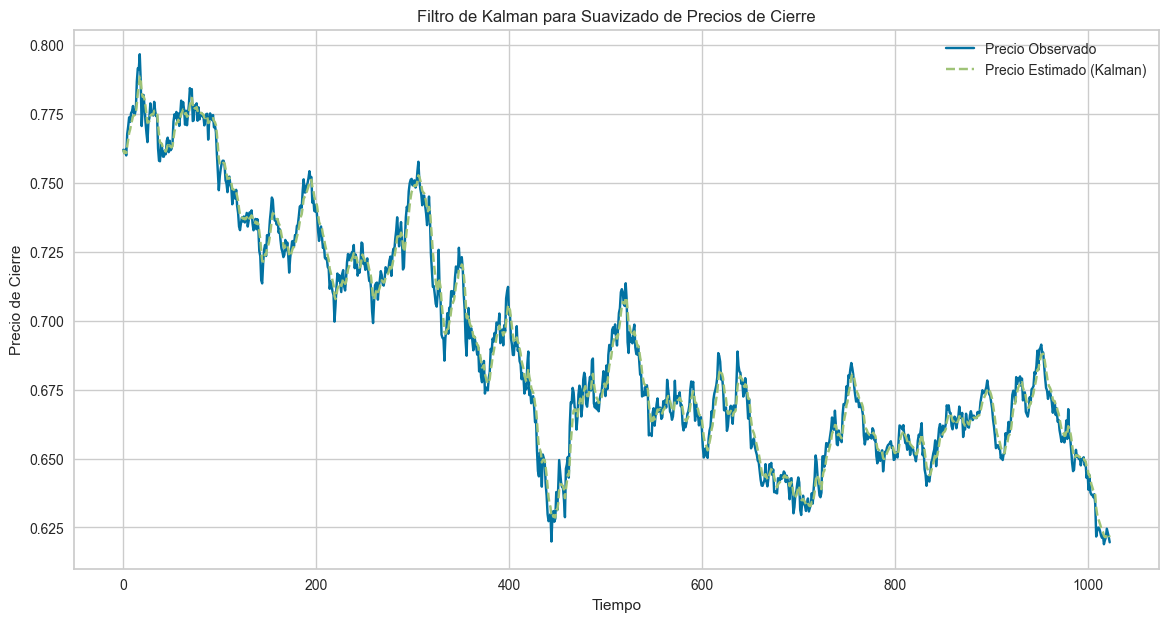

In [75]:
import numpy as np
import pandas as pd

# Supongamos que tienes un DataFrame df con la columna 'close' que contiene los precios de cierre
#R=0.000034
#Q=0.00001
# Inicializar las matrices del filtro de Kalman
n = len(df)
observed_price = df['close'].values
predicted_price = np.zeros(n)
predicted_covariance = np.zeros(n)
estimated_price = np.zeros(n)
estimated_covariance = np.zeros(n)

# Valores iniciales
estimated_price[0] = observed_price[0]
estimated_covariance[0] = 1.0

for k in range(1, n):
    # Predicción
    predicted_price[k] = estimated_price[k-1]
    predicted_covariance[k] = estimated_covariance[k-1] + Q

    # Ganancia de Kalman
    K = predicted_covariance[k] / (predicted_covariance[k] + R)

    # Actualización
    estimated_price[k] = predicted_price[k] + K * (observed_price[k] - predicted_price[k])
    estimated_covariance[k] = (1 - K) * predicted_covariance[k]

# Agregar la estimación al DataFrame
df['estimated_close'] = estimated_price
df['estimated_covariance'] = estimated_covariance
df['std_estimated_close'] = np.sqrt(df['estimated_covariance'])

# Visualizar los resultados
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 7))
plt.plot(df['close'], label='Precio Observado')
plt.plot(df['estimated_close'], label='Precio Estimado (Kalman)', linestyle='--')
plt.xlabel('Tiempo')
plt.ylabel('Precio de Cierre')
plt.title('Filtro de Kalman para Suavizado de Precios de Cierre')
plt.legend()
plt.show()

In [76]:
df

time     open     high      low    close  tick_volume  spread  \
0    2021-02-01  0.76189  0.76626  0.76058  0.76205       104719       0   
1    2021-02-02  0.76195  0.76618  0.75638  0.76082        85910       0   
2    2021-02-03  0.76066  0.76265  0.76016  0.76205        71325       0   
3    2021-02-04  0.76179  0.76477  0.75882  0.75999        67096       0   
4    2021-02-05  0.75995  0.76787  0.75829  0.76775        63978       0   
...         ...      ...      ...      ...      ...          ...     ...   
1019 2025-01-03  0.61965  0.62253  0.61912  0.62140       113529       0   
1020 2025-01-06  0.62062  0.63022  0.62016  0.62452       180283       0   
1021 2025-01-07  0.62345  0.62881  0.62277  0.62304       141545       0   
1022 2025-01-08  0.62269  0.62421  0.61874  0.62157       153783       0   
1023 2025-01-09  0.62052  0.62157  0.61719  0.61959        64747       0   

      real_volume  hour  day  month  year  estimated_close  \
0               0     0    1      2  2021         0.762050   
1               0     0    2      2  2021         0.760820   
2               0     0    3      2  2021         0.761472   
3               0     0    4      2  2021         0.760885   
4               0     0    5      2  2021         0.763242   
...           ...   ...  ...    ...   ...              ...   
1019            0     0    3      1  2025         0.621464   
1020            0     0    6      1  2025         0.622375   
1021            0     0    7      1  2025         0.622573   
1022            0     0    8      1  2025         0.622274   
1023            0     0    9      1  2025         0.621474   

      estimated_covariance  std_estimated_close  
0                 1.000000             1.000000  
1                 0.000339             0.018406  
2                 0.000180             0.013398  
3                 0.000134             0.011588  
4                 0.000116             0.010787  
...                    ...                  ...  
1019              0.000101             0.010051  
1020              0.000101             0.010051  
1021              0.000101             0.010051  
1022              0.000101             0.010051  
1023              0.000101             0.010051  

[1024 rows x 15 columns]

In [77]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Función para calcular las bandas de Bollinger y generar señales de entrada y salida
def calculate_bollinger_bands_with_moving_averages(df, moving_avg_window=10):
    # Calcular la media móvil
    moving_avg = df['close'].rolling(window=moving_avg_window).mean()
    
    # Calcular la desviación estándar y las bandas de Bollinger
    std_dev = df['std_estimated_close']  # Desviación estándar como raíz cuadrada de la varianza estimada
    rolling_mean = df['estimated_close']#.rolling(window=window).mean()
    upper_band = rolling_mean + std_dev
    lower_band = rolling_mean - std_dev
    
    # Generar señales de trading
    df['buy_signal'] = 0
    df['sell_signal'] = 0
    df['buy_signal'] = np.where(
        (df['close'] < lower_band) & (df['close'] < moving_avg), 1, df['buy_signal']
    )
    df['sell_signal'] = np.where(
        (df['close'] > upper_band) & (df['close'] > moving_avg), -1, df['sell_signal']
    )
    
    return df, rolling_mean, upper_band, lower_band, moving_avg

# Función para identificar las señales de salida basadas en la media móvil
def identify_exit_signals(df, rolling_mean):
    df['exit_buy_signal'] = 0
    df['exit_sell_signal'] = 0
    buy_signals = df[df['buy_signal'] == 1].index
    sell_signals = df[df['sell_signal'] == -1].index

    for buy_date in buy_signals:
        exit_date = df[df.index > buy_date].index[df.loc[df.index > buy_date, 'close'] >= rolling_mean[df.index > buy_date]].min()
        if not pd.isna(exit_date):
            df.loc[exit_date, 'exit_buy_signal'] = 1

    for sell_date in sell_signals:
        exit_date = df[df.index > sell_date].index[df.loc[df.index > sell_date, 'close'] <= rolling_mean[df.index > sell_date]].min()
        if not pd.isna(exit_date):
            df.loc[exit_date, 'exit_sell_signal'] = -1
    
    return df

# Calcular las bandas de Bollinger y señales
df, rolling_mean, upper_band, lower_band, moving_avg = calculate_bollinger_bands_with_moving_averages(
    df
)

# Identificar las señales de salida
df = identify_exit_signals(df, rolling_mean)

# Cálculo del RSI
window_rsi = 13
delta = df['close'].diff()
gain = np.where(delta > 0, delta, 0)
loss = np.where(delta < 0, -delta, 0)

avg_gain = pd.Series(gain).rolling(window=window_rsi).mean()
avg_loss = pd.Series(loss).rolling(window=window_rsi).mean()
rs = avg_gain / avg_loss
df['rsi'] = 100 - (100 / (1 + rs))
df['rsi_avg'] = df['rsi'].rolling(window=window_rsi).mean()


In [78]:
import pandas as pd

# Supongamos que tu DataFrame es "df"
df['profit_loss'] = 0  # Inicializamos una columna para almacenar las ganancias/pérdidas

# Variables para rastrear la posición activa
position = None
entry_price = 0

# Recorrer cada fila y calcular las ganancias/pérdidas
for index, row in df.iterrows():
    if row['buy_signal'] == 1:  # Señal de compra
        position = 'long'
        entry_price = row['close']
    elif row['sell_signal'] == 1:  # Señal de venta
        position = 'short'
        entry_price = row['close']
    elif row['exit_buy_signal'] == 1 and position == 'long':  # Salir de compra
        df.loc[index, 'profit_loss'] = row['close'] - entry_price
        position = None
    elif row['exit_sell_signal'] == 1 and position == 'short':  # Salir de venta
        df.loc[index, 'profit_loss'] = entry_price - row['close']
        position = None

# Filtrar ganancias y pérdidas
gains = df['profit_loss'][df['profit_loss'] > 0]
losses = df['profit_loss'][df['profit_loss'] < 0]

# Calcular promedio de ganancias y pérdidas
average_gain = gains.mean() if not gains.empty else 0
average_loss = losses.mean() if not losses.empty else 0

# Mostrar resultados
print(f"Ganancia promedio: {average_gain:.2f}")
print(f"Pérdida promedio: {abs(average_loss):.2f}")


Ganancia promedio: 0.01
Pérdida promedio: 0.01


In [79]:
# Calcular win_rate, average_gain y average_loss basado en el DataFrame previamente generado
total_trades = len(df['profit_loss'][df['profit_loss'] != 0])  # Total de operaciones (no cero)
winning_trades = len(df['profit_loss'][df['profit_loss'] > 0])  # Operaciones ganadoras
win_rate = winning_trades / total_trades if total_trades > 0 else 0  # Ratio de ganancia

# Si ya tenemos los valores de average_gain y average_loss del paso anterior:
# average_gain y average_loss están calculados previamente

# Función para aplicar el criterio de Kelly
def kelly_criterion(win_rate, avg_gain, avg_loss):
    if avg_loss == 0 or win_rate == 0:  # Evitar divisiones por cero o casos donde Kelly no aplica
        return 0
    b = avg_gain / abs(avg_loss)
    kelly_fraction = (win_rate * (b + 1) - 1) / b
    return max(0, min(1, kelly_fraction))  # Limitar entre 0 y 1

# Aplicar el criterio de Kelly
kelly_fraction = kelly_criterion(win_rate, average_gain, average_loss)
print(f"Fracción óptima a invertir (Criterio de Kelly): {kelly_fraction:.2%}")

# Determinar el monto a invertir en cada operación basado en el capital disponible
initial_capital = 100  # Capital inicial disponible
investment_amount = kelly_fraction / 22 * (initial_capital / 2)  # Ajustar fracción según el criterio
print(f"Monto a invertir por operación: ${investment_amount:.2f}")


Fracción óptima a invertir (Criterio de Kelly): 85.78%
Monto a invertir por operación: $1.95


In [80]:
import pandas as pd
import numpy as np

def compute_rsi(series, period):
    """Calcula el índice de fuerza relativa (RSI) para una serie de precios."""
    delta = series.diff()
    gain = (delta.where(delta > 0, 0)).rolling(window=period).mean()
    loss = (-delta.where(delta < 0, 0)).rolling(window=period).mean()
    
    rs = gain / loss
    rsi = 100 - (100 / (1 + rs))
    return rsi

def find_best_rsi_period(df, rsi_periods, upper_threshold=70, lower_threshold=30, window=20):
    # Cálculo de datos necesarios sin modificar el DataFrame
    estimated_close = df['estimated_close']
    std_estimated_close = estimated_close.rolling(window=window).std()
    rolling_mean = estimated_close.rolling(window=window).mean()
    
    close = df['close']
    upper_band = rolling_mean + std_estimated_close
    lower_band = rolling_mean - std_estimated_close

    best_period = None
    best_score = float('inf')  # Inicializar con infinito para buscar el mínimo

    for period in rsi_periods:
        # Calcular RSI para el período actual (sin modificar `df`)
        rsi = compute_rsi(close, period)

        # Calcular la distancia del RSI a los umbrales
        distances = np.where(
            close > upper_band, abs(rsi - upper_threshold),
            np.where(close < lower_band, abs(rsi - lower_threshold), np.nan)
        )

        # Calcular el puntaje total (suma de distancias, ignorando NaNs)
        total_distance = np.nansum(distances)

        # Actualizar el mejor período si se encuentra un puntaje menor
        if total_distance < best_score:
            best_score = total_distance
            best_period = period

    return best_period, best_score

# Definir rangos de períodos para probar
rsi_periods = range(2, 30)  # Ajustar el rango según sea necesario

# Llamar a la función
best_rsi_period, best_distance = find_best_rsi_period(df, rsi_periods)

# Mostrar resultados
print(f"Mejor período del RSI: {best_rsi_period} con una distancia total de {best_distance}")


Mejor período del RSI: 15 con una distancia total de 5717.238108619227


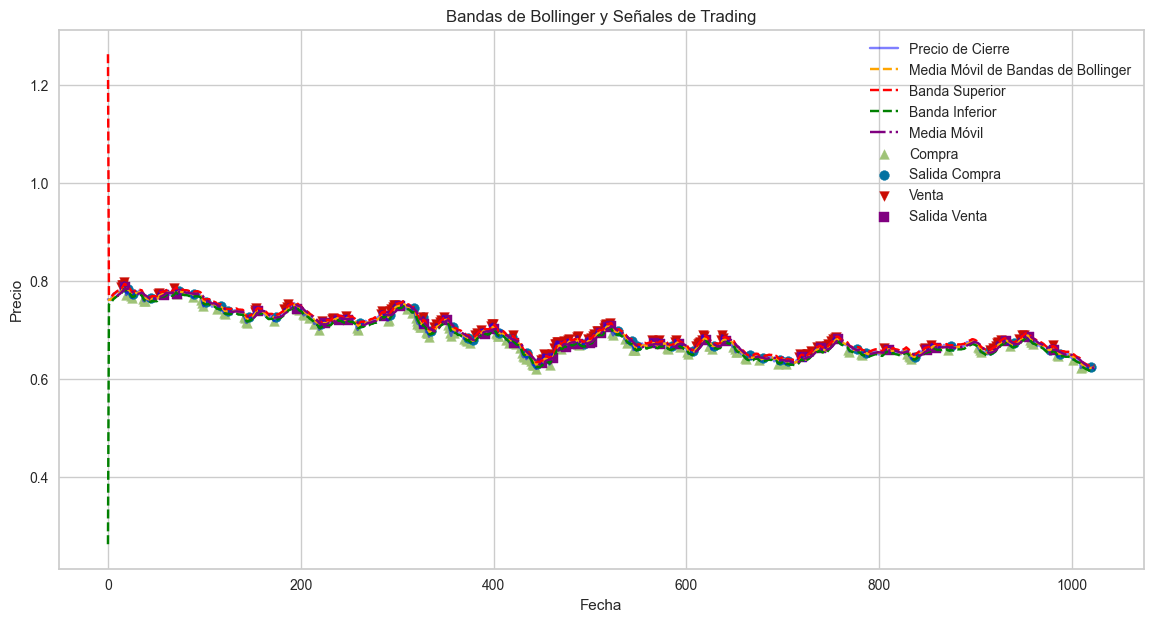

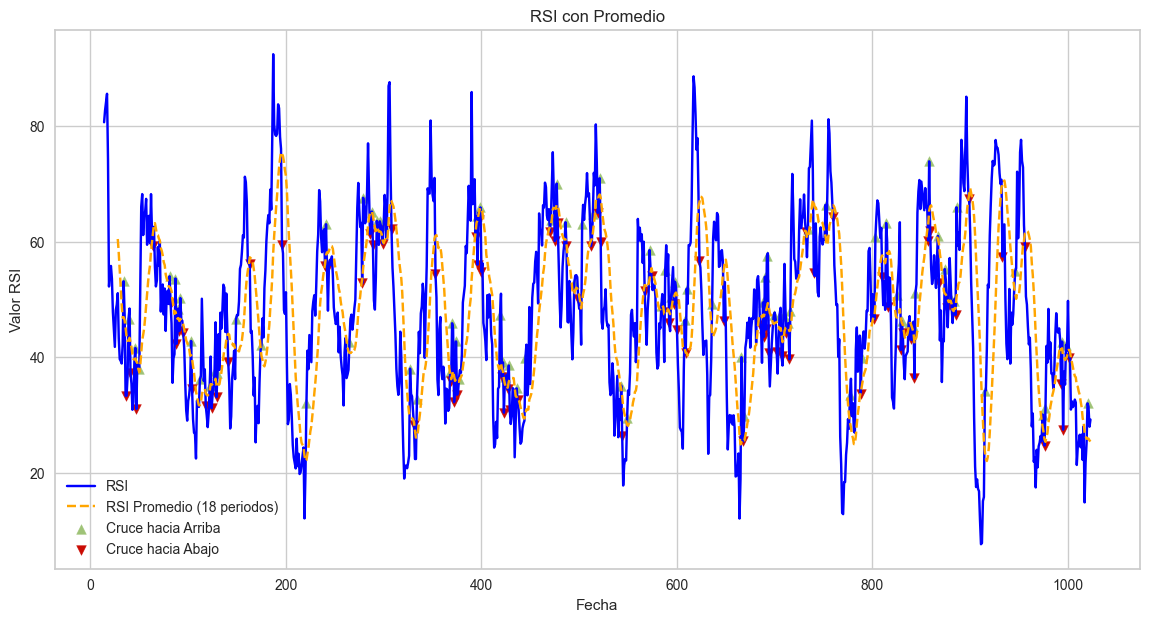

In [81]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Función para calcular las bandas de Bollinger y generar señales de entrada y salida
def calculate_bollinger_bands_with_moving_averages(df, moving_avg_window=10):
    # Calcular la media móvil
    moving_avg = df['close'].rolling(window=moving_avg_window).mean()
    
    # Calcular la desviación estándar y las bandas de Bollinger
    std_dev = df['std_estimated_close']  # Desviación estándar como raíz cuadrada de la varianza estimada
    rolling_mean = df['estimated_close'] #.rolling(window=window).mean()
    upper_band = rolling_mean + 0.5*std_dev
    lower_band = rolling_mean - 0.5*std_dev
    
    # Generar señales de trading
    df['buy_signal'] = 0
    df['sell_signal'] = 0
    df['buy_signal'] = np.where(
        (df['close'] < lower_band) & (df['close'] < moving_avg), 1, df['buy_signal']
    )
    df['sell_signal'] = np.where(
        (df['close'] > upper_band) & (df['close'] > moving_avg), -1, df['sell_signal']
    )
    
    return df, rolling_mean, upper_band, lower_band, moving_avg

# Función para identificar las señales de salida basadas en la media móvil
def identify_exit_signals(df, rolling_mean):
    df['exit_buy_signal'] = 0
    df['exit_sell_signal'] = 0
    buy_signals = df[df['buy_signal'] == 1].index
    sell_signals = df[df['sell_signal'] == -1].index

    for buy_date in buy_signals:
        exit_date = df[df.index > buy_date].index[df.loc[df.index > buy_date, 'close'] >= rolling_mean[df.index > buy_date]].min()
        if not pd.isna(exit_date):
            df.loc[exit_date, 'exit_buy_signal'] = 1

    for sell_date in sell_signals:
        exit_date = df[df.index > sell_date].index[df.loc[df.index > sell_date, 'close'] <= rolling_mean[df.index > sell_date]].min()
        if not pd.isna(exit_date):
            df.loc[exit_date, 'exit_sell_signal'] = -1
    
    return df

# Calcular las bandas de Bollinger y señales
df, rolling_mean, upper_band, lower_band, moving_avg = calculate_bollinger_bands_with_moving_averages(
    df
)

# Identificar las señales de salida
df = identify_exit_signals(df, rolling_mean)

# Graficar Bandas de Bollinger y señales
plt.figure(figsize=(14, 7))
plt.plot(df.index, df['close'], label='Precio de Cierre', color='blue', alpha=0.5)
plt.plot(df.index, rolling_mean, label='Media Móvil de Bandas de Bollinger', color='orange', linestyle='--')
plt.plot(df.index, upper_band, label='Banda Superior', color='red', linestyle='--')
plt.plot(df.index, lower_band, label='Banda Inferior', color='green', linestyle='--')
plt.plot(df.index, moving_avg, label='Media Móvil', color='purple', linestyle='-.')

# Señales de compra y salida
plt.scatter(df.index[df['buy_signal'] == 1], df['close'][df['buy_signal'] == 1], marker='^', color='g', label='Compra', alpha=1)
plt.scatter(df.index[df['exit_buy_signal'] == 1], df['close'][df['exit_buy_signal'] == 1], marker='o', color='b', label='Salida Compra', alpha=1)
plt.scatter(df.index[df['sell_signal'] == -1], df['close'][df['sell_signal'] == -1], marker='v', color='r', label='Venta', alpha=1)
plt.scatter(df.index[df['exit_sell_signal'] == -1], df['close'][df['exit_sell_signal'] == -1], marker='s', color='purple', label='Salida Venta', alpha=1)

plt.title('Bandas de Bollinger y Señales de Trading')
plt.xlabel('Fecha')
plt.ylabel('Precio')
plt.legend()
plt.show()

# Cálculo del RSI
window_rsi = best_rsi_period
delta = df['close'].diff()
gain = np.where(delta > 0, delta, 0)
loss = np.where(delta < 0, -delta, 0)

avg_gain = pd.Series(gain).rolling(window=window_rsi).mean()
avg_loss = pd.Series(loss).rolling(window=window_rsi).mean()
rs = avg_gain / avg_loss
df['rsi'] = 100 - (100 / (1 + rs))
df['rsi_avg'] = df['rsi'].rolling(window=window_rsi).mean()

# Gráfico del RSI
plt.figure(figsize=(14, 7))
plt.plot(df.index, df['rsi'], label='RSI', color='blue')
plt.plot(df.index, df['rsi_avg'], label='RSI Promedio (18 periodos)', color='orange', linestyle='--')
plt.scatter(df.index[(df['rsi'].shift(1) < df['rsi_avg'].shift(1)) & (df['rsi'] > df['rsi_avg'])], 
            df['rsi'][(df['rsi'].shift(1) < df['rsi_avg'].shift(1)) & (df['rsi'] > df['rsi_avg'])], 
            marker='^', color='g', label='Cruce hacia Arriba', alpha=1)
plt.scatter(df.index[(df['rsi'].shift(1) > df['rsi_avg'].shift(1)) & (df['rsi'] < df['rsi_avg'])], 
            df['rsi'][(df['rsi'].shift(1) > df['rsi_avg'].shift(1)) & (df['rsi'] < df['rsi_avg'])], 
            marker='v', color='r', label='Cruce hacia Abajo', alpha=1)

plt.title('RSI con Promedio')
plt.xlabel('Fecha')
plt.ylabel('Valor RSI')
plt.legend()
plt.show()


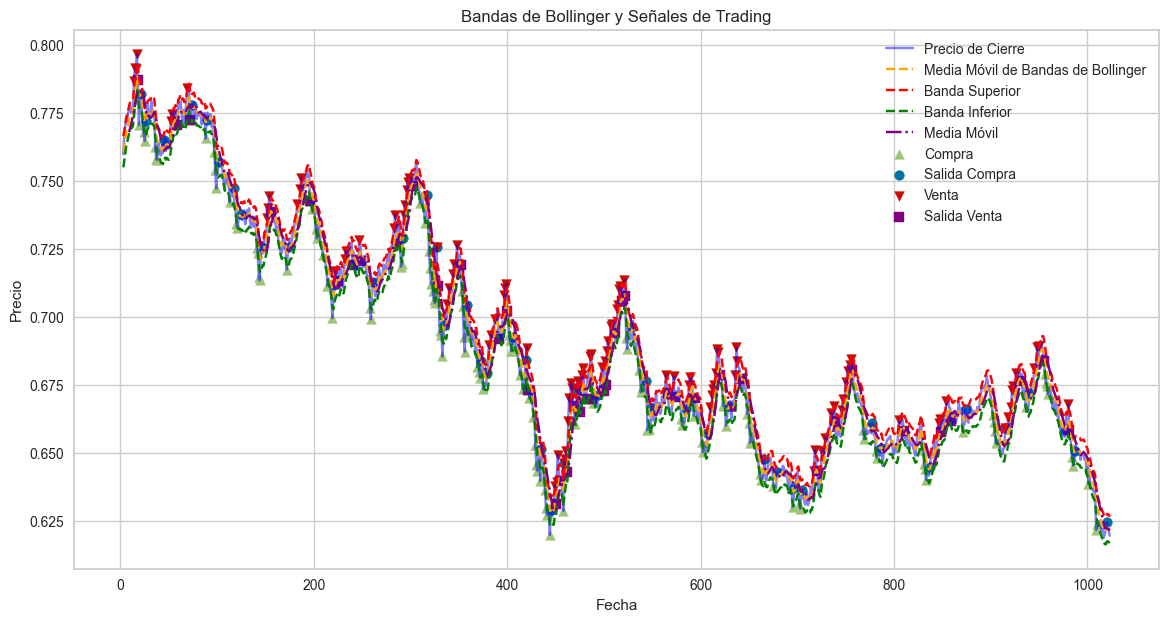

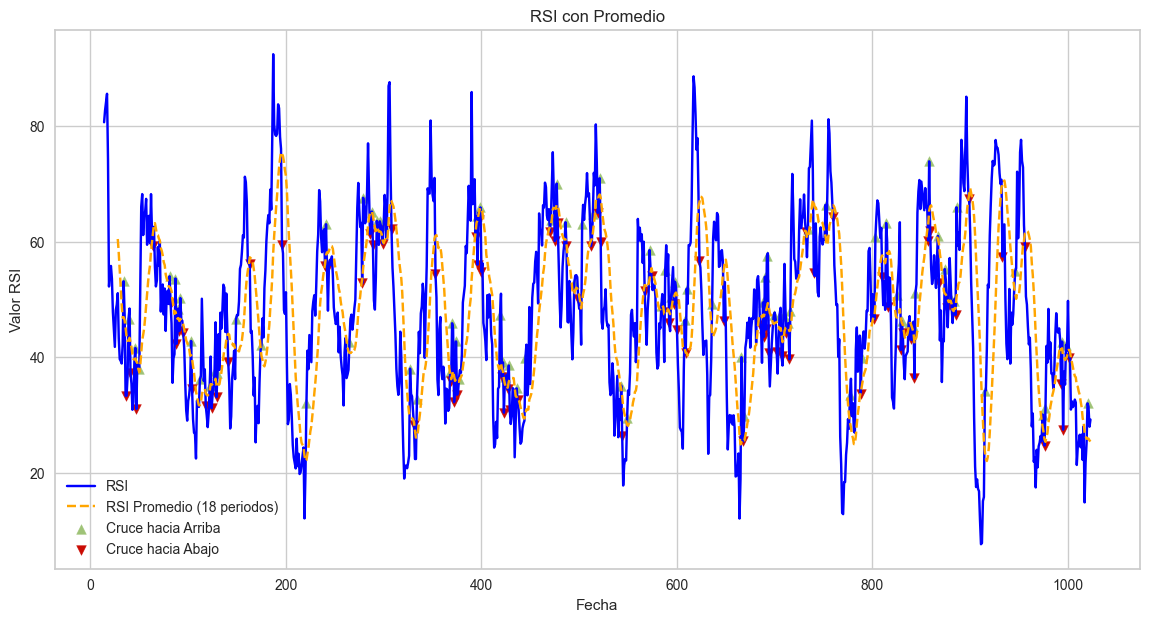

In [82]:
# Excluir los primeros 3 puntos del DataFrame para los gráficos
df_trimmed = df.iloc[3:]

# Graficar Bandas de Bollinger y señales
plt.figure(figsize=(14, 7))
plt.plot(df_trimmed.index, df_trimmed['close'], label='Precio de Cierre', color='blue', alpha=0.5)
plt.plot(df_trimmed.index, rolling_mean.iloc[3:], label='Media Móvil de Bandas de Bollinger', color='orange', linestyle='--')
plt.plot(df_trimmed.index, upper_band.iloc[3:], label='Banda Superior', color='red', linestyle='--')
plt.plot(df_trimmed.index, lower_band.iloc[3:], label='Banda Inferior', color='green', linestyle='--')
plt.plot(df_trimmed.index, moving_avg.iloc[3:], label='Media Móvil', color='purple', linestyle='-.')

# Señales de compra y salida
plt.scatter(df_trimmed.index[df_trimmed['buy_signal'] == 1], df_trimmed['close'][df_trimmed['buy_signal'] == 1], marker='^', color='g', label='Compra', alpha=1)
plt.scatter(df_trimmed.index[df_trimmed['exit_buy_signal'] == 1], df_trimmed['close'][df_trimmed['exit_buy_signal'] == 1], marker='o', color='b', label='Salida Compra', alpha=1)
plt.scatter(df_trimmed.index[df_trimmed['sell_signal'] == -1], df_trimmed['close'][df_trimmed['sell_signal'] == -1], marker='v', color='r', label='Venta', alpha=1)
plt.scatter(df_trimmed.index[df_trimmed['exit_sell_signal'] == -1], df_trimmed['close'][df_trimmed['exit_sell_signal'] == -1], marker='s', color='purple', label='Salida Venta', alpha=1)

plt.title('Bandas de Bollinger y Señales de Trading')
plt.xlabel('Fecha')
plt.ylabel('Precio')
plt.legend()
plt.show()

# Gráfico del RSI
plt.figure(figsize=(14, 7))
plt.plot(df_trimmed.index, df_trimmed['rsi'], label='RSI', color='blue')
plt.plot(df_trimmed.index, df_trimmed['rsi_avg'], label='RSI Promedio (18 periodos)', color='orange', linestyle='--')
plt.scatter(df_trimmed.index[(df_trimmed['rsi'].shift(1) < df_trimmed['rsi_avg'].shift(1)) & (df_trimmed['rsi'] > df_trimmed['rsi_avg'])], 
            df_trimmed['rsi'][(df_trimmed['rsi'].shift(1) < df_trimmed['rsi_avg'].shift(1)) & (df_trimmed['rsi'] > df_trimmed['rsi_avg'])], 
            marker='^', color='g', label='Cruce hacia Arriba', alpha=1)
plt.scatter(df_trimmed.index[(df_trimmed['rsi'].shift(1) > df_trimmed['rsi_avg'].shift(1)) & (df_trimmed['rsi'] < df_trimmed['rsi_avg'])], 
            df_trimmed['rsi'][(df_trimmed['rsi'].shift(1) > df_trimmed['rsi_avg'].shift(1)) & (df_trimmed['rsi'] < df_trimmed['rsi_avg'])], 
            marker='v', color='r', label='Cruce hacia Abajo', alpha=1)

plt.title('RSI con Promedio')
plt.xlabel('Fecha')
plt.ylabel('Valor RSI')
plt.legend()
plt.show()


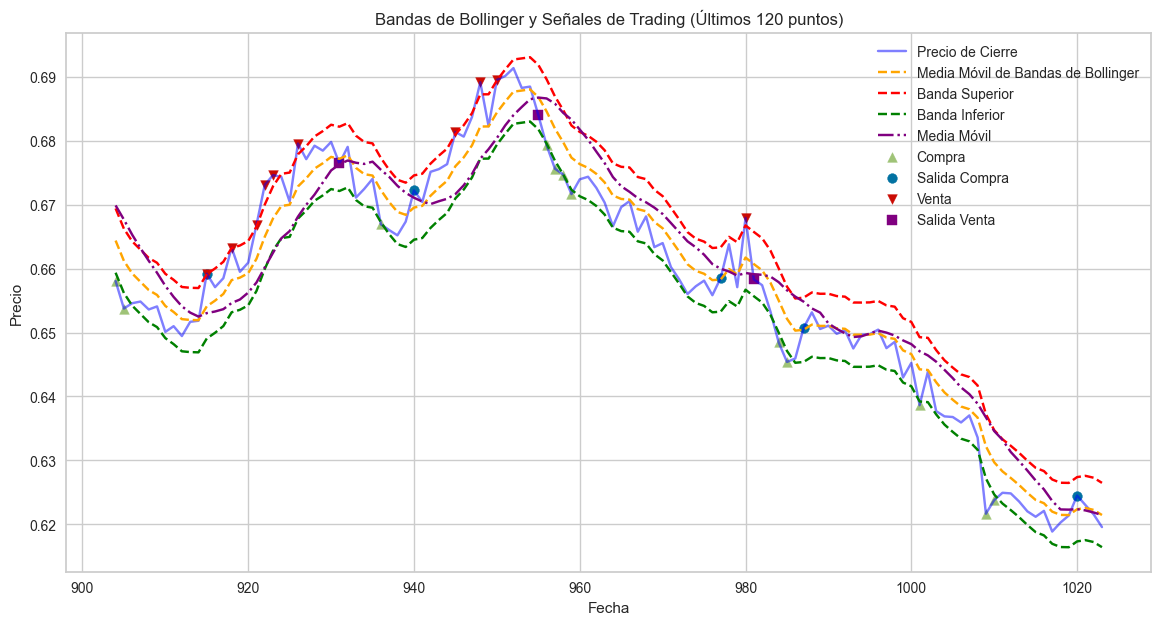

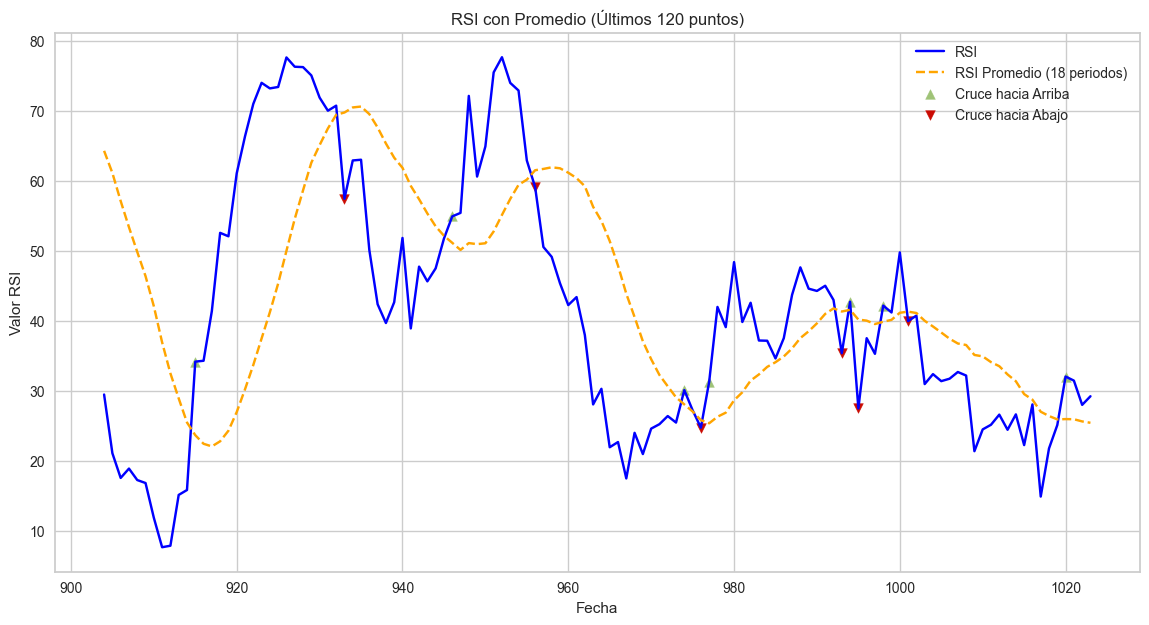

In [83]:
# Filtrar los últimos 120 puntos
df_last_120 = df.tail(120)

# Graficar Bandas de Bollinger y señales (últimos 120 puntos)
plt.figure(figsize=(14, 7))
plt.plot(df_last_120.index, df_last_120['close'], label='Precio de Cierre', color='blue', alpha=0.5)
plt.plot(df_last_120.index, rolling_mean.tail(120), label='Media Móvil de Bandas de Bollinger', color='orange', linestyle='--')
plt.plot(df_last_120.index, upper_band.tail(120), label='Banda Superior', color='red', linestyle='--')
plt.plot(df_last_120.index, lower_band.tail(120), label='Banda Inferior', color='green', linestyle='--')
plt.plot(df_last_120.index, moving_avg.tail(120), label='Media Móvil', color='purple', linestyle='-.')

plt.scatter(df_last_120.index[df_last_120['buy_signal'] == 1], df_last_120['close'][df_last_120['buy_signal'] == 1], marker='^', color='g', label='Compra', alpha=1)
plt.scatter(df_last_120.index[df_last_120['exit_buy_signal'] == 1], df_last_120['close'][df_last_120['exit_buy_signal'] == 1], marker='o', color='b', label='Salida Compra', alpha=1)
plt.scatter(df_last_120.index[df_last_120['sell_signal'] == -1], df_last_120['close'][df_last_120['sell_signal'] == -1], marker='v', color='r', label='Venta', alpha=1)
plt.scatter(df_last_120.index[df_last_120['exit_sell_signal'] == -1], df_last_120['close'][df_last_120['exit_sell_signal'] == -1], marker='s', color='purple', label='Salida Venta', alpha=1)

plt.title('Bandas de Bollinger y Señales de Trading (Últimos 120 puntos)')
plt.xlabel('Fecha')
plt.ylabel('Precio')
plt.legend()
plt.show()

# Graficar RSI (últimos 120 puntos)
plt.figure(figsize=(14, 7))
plt.plot(df_last_120.index, df_last_120['rsi'], label='RSI', color='blue')
plt.plot(df_last_120.index, df_last_120['rsi_avg'], label='RSI Promedio (18 periodos)', color='orange', linestyle='--')
plt.scatter(df_last_120.index[(df_last_120['rsi'].shift(1) < df_last_120['rsi_avg'].shift(1)) & (df_last_120['rsi'] > df_last_120['rsi_avg'])], 
            df_last_120['rsi'][(df_last_120['rsi'].shift(1) < df_last_120['rsi_avg'].shift(1)) & (df_last_120['rsi'] > df_last_120['rsi_avg'])], 
            marker='^', color='g', label='Cruce hacia Arriba', alpha=1)
plt.scatter(df_last_120.index[(df_last_120['rsi'].shift(1) > df_last_120['rsi_avg'].shift(1)) & (df_last_120['rsi'] < df_last_120['rsi_avg'])], 
            df_last_120['rsi'][(df_last_120['rsi'].shift(1) > df_last_120['rsi_avg'].shift(1)) & (df_last_120['rsi'] < df_last_120['rsi_avg'])], 
            marker='v', color='r', label='Cruce hacia Abajo', alpha=1)

plt.title('RSI con Promedio (Últimos 120 puntos)')
plt.xlabel('Fecha')
plt.ylabel('Valor RSI')
plt.legend()
plt.show()


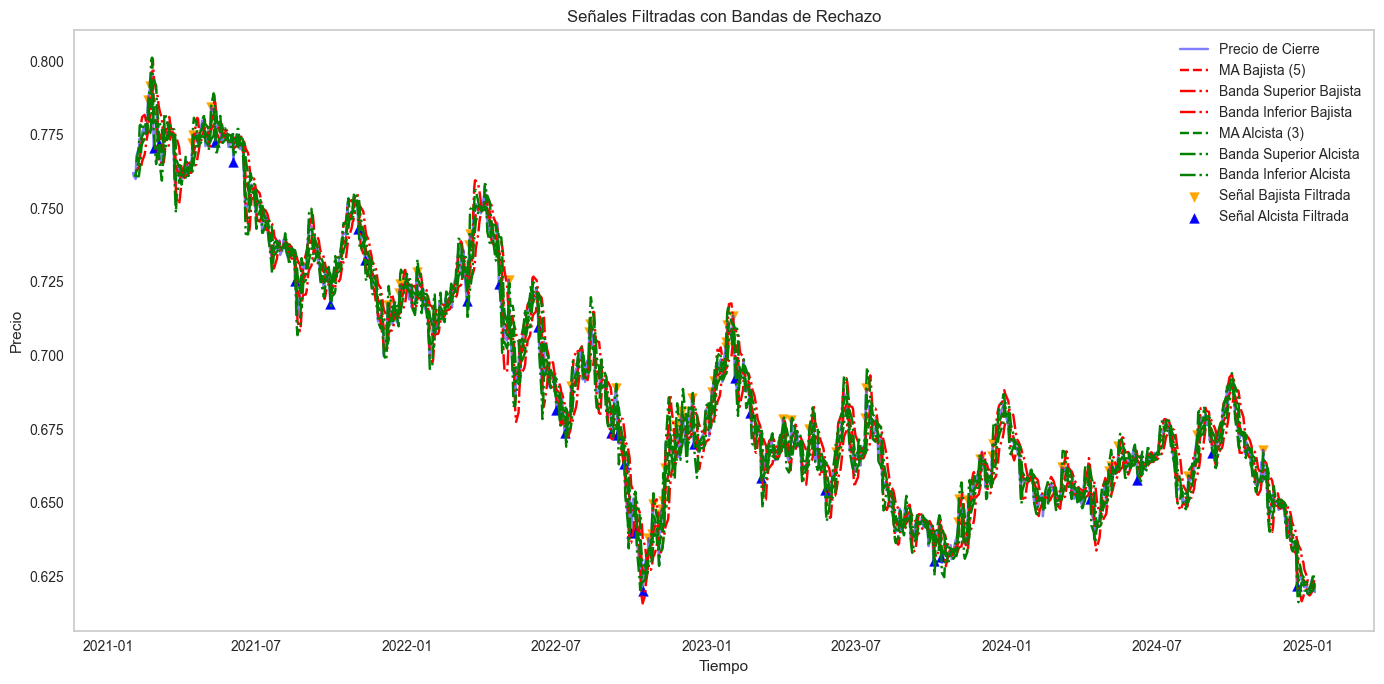

In [84]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Función para calcular medias móviles
def calculate_moving_average(df, window):
    return df['close'].rolling(window=window).mean()

# Función para calcular la desviación estándar
def calculate_std_dev(df, column, window):
    return df[column].rolling(window=window).std()

# Función para evaluar señales con bandas de rechazo
def evaluate_signals_with_bands(df, ma_column, std_dev_column, signal_column):
    """
    Evalúa señales y las filtra en función de bandas de rechazo.
    """
    # Crear columnas para las señales filtradas
    df[f'filtered_{signal_column}'] = 0

    for idx, row in df.iterrows():
        upper_band = row[ma_column] + 2.5 * row[std_dev_column]
        lower_band = row[ma_column] - 2.5 * row[std_dev_column]

        if row[signal_column] == -1:  # Señal bajista
            if row['close'] > upper_band:  # Fuera de la banda superior
                df.at[idx, f'filtered_{signal_column}'] = -1

        elif row[signal_column] == 1:  # Señal alcista
            if row['close'] < lower_band:  # Fuera de la banda inferior
                df.at[idx, f'filtered_{signal_column}'] = 1

    return df

# Función para probar señales con medias móviles y bandas de rechazo
def manual_ma_test_with_bands(df, buy_window, sell_window):
    """
    Prueba señales alcistas y bajistas con medias móviles y bandas de rechazo.
    """
    # Calcular medias móviles y desviaciones estándar
    df['bullish_ma'] = calculate_moving_average(df, buy_window)
    df['bearish_ma'] = calculate_moving_average(df, sell_window)
    df['bullish_std_dev'] = calculate_std_dev(df, 'bullish_ma', buy_window)
    df['bearish_std_dev'] = calculate_std_dev(df, 'bearish_ma', sell_window)

    # Calcular bandas de rechazo
    df['bullish_upper_band'] = df['bullish_ma'] + 2 * df['bullish_std_dev']
    df['bullish_lower_band'] = df['bullish_ma'] - 2 * df['bullish_std_dev']
    df['bearish_upper_band'] = df['bearish_ma'] + 2 * df['bearish_std_dev']
    df['bearish_lower_band'] = df['bearish_ma'] - 2 * df['bearish_std_dev']

    # Evaluar señales con bandas de rechazo
    df = evaluate_signals_with_bands(df, 'bearish_ma', 'bearish_std_dev', 'sell_signal')
    df = evaluate_signals_with_bands(df, 'bullish_ma', 'bullish_std_dev', 'buy_signal')

    return df

# Configuración de ventanas
buy_window = 3  # Ventana para señales alcistas
sell_window = 5  # Ventana para señales bajistas

# Ejecutar prueba de señales
df = manual_ma_test_with_bands(df, buy_window, sell_window)

# Graficar resultados
plt.figure(figsize=(14, 7))
plt.plot(df['time'], df['close'], label='Precio de Cierre', color='blue', alpha=0.5)

# Graficar medias móviles y bandas
plt.plot(df['time'], df['bearish_ma'], label=f'MA Bajista ({sell_window})', color='red', linestyle='--')
plt.plot(df['time'], df['bearish_upper_band'], label='Banda Superior Bajista', color='red', linestyle='-.')
plt.plot(df['time'], df['bearish_lower_band'], label='Banda Inferior Bajista', color='red', linestyle='-.')
plt.plot(df['time'], df['bullish_ma'], label=f'MA Alcista ({buy_window})', color='green', linestyle='--')
plt.plot(df['time'], df['bullish_upper_band'], label='Banda Superior Alcista', color='green', linestyle='-.')
plt.plot(df['time'], df['bullish_lower_band'], label='Banda Inferior Alcista', color='green', linestyle='-.')

# Señales filtradas
plt.scatter(df[df['filtered_sell_signal'] == -1]['time'], df[df['filtered_sell_signal'] == -1]['close'], label='Señal Bajista Filtrada', color='orange', marker='v')
plt.scatter(df[df['filtered_buy_signal'] == 1]['time'], df[df['filtered_buy_signal'] == 1]['close'], label='Señal Alcista Filtrada', color='blue', marker='^')

plt.title('Señales Filtradas con Bandas de Rechazo')
plt.xlabel('Tiempo')
plt.ylabel('Precio')
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()


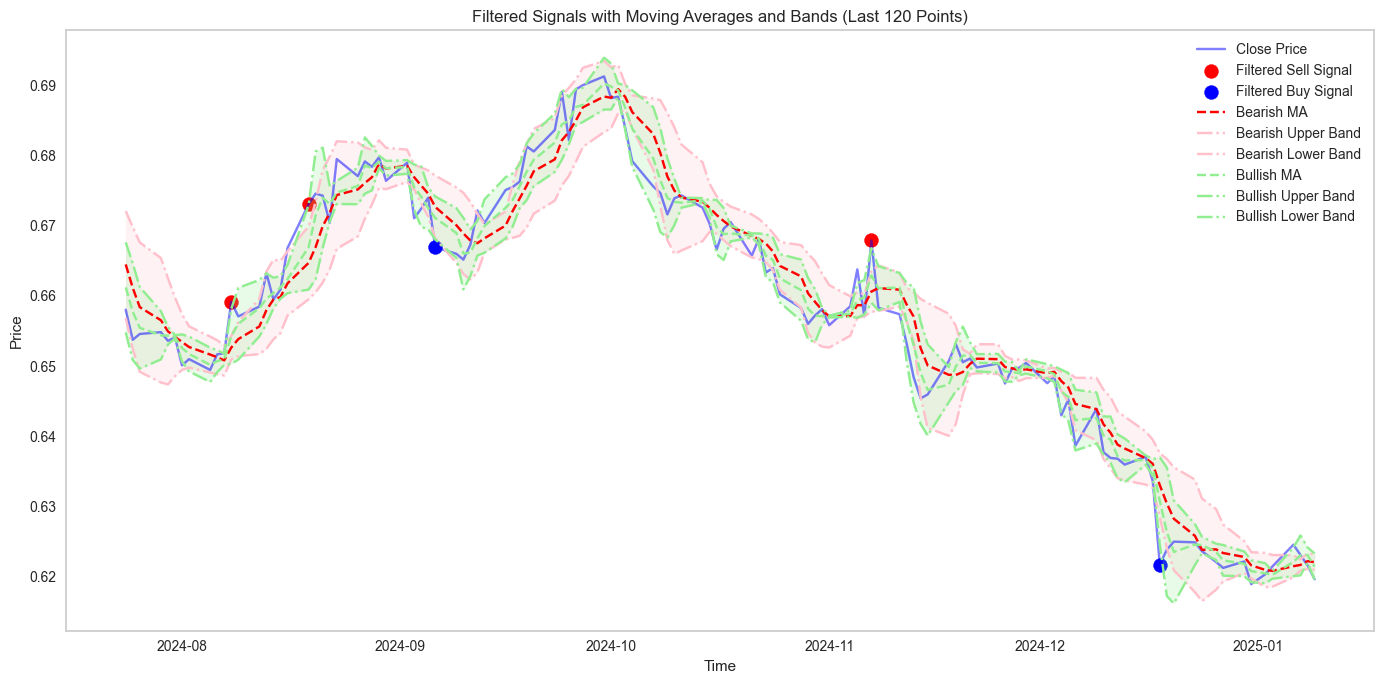

In [85]:
import matplotlib.pyplot as plt

# Filtrar los últimos 120 puntos del DataFrame
df_last_120 = df.tail(120)

# Graficar los últimos 120 puntos
plt.figure(figsize=(14, 7))
plt.plot(df_last_120['time'], df_last_120['close'], label='Close Price', color='blue', alpha=0.5)

# Señales filtradas (si existiesen)
plt.scatter(df_last_120[df_last_120['filtered_sell_signal'] == -1]['time'], df_last_120[df_last_120['filtered_sell_signal'] == -1]['close'], label='Filtered Sell Signal', color='red', marker='o', s=100)
plt.scatter(df_last_120[df_last_120['filtered_buy_signal'] == 1]['time'], df_last_120[df_last_120['filtered_buy_signal'] == 1]['close'], label='Filtered Buy Signal', color='blue', marker='o', s=100)


# Media móvil bajista
plt.plot(df_last_120['time'], df_last_120['bearish_ma'], label='Bearish MA', color='red', linestyle='--')
plt.plot(df_last_120['time'], df_last_120['bearish_upper_band'], label='Bearish Upper Band', color='pink', linestyle='-.')
plt.plot(df_last_120['time'], df_last_120['bearish_lower_band'], label='Bearish Lower Band', color='pink', linestyle='-.')
plt.fill_between(df_last_120['time'], df_last_120['bearish_upper_band'], df_last_120['bearish_lower_band'], color='pink', alpha=0.2)

# Media móvil alcista
plt.plot(df_last_120['time'], df_last_120['bullish_ma'], label='Bullish MA', color='lightgreen', linestyle='--')
plt.plot(df_last_120['time'], df_last_120['bullish_upper_band'], label='Bullish Upper Band', color='lightgreen', linestyle='-.')
plt.plot(df_last_120['time'], df_last_120['bullish_lower_band'], label='Bullish Lower Band', color='lightgreen', linestyle='-.')
plt.fill_between(df_last_120['time'], df_last_120['bullish_upper_band'], df_last_120['bullish_lower_band'], color='lightgreen', alpha=0.2)


plt.title('Filtered Signals with Moving Averages and Bands (Last 120 Points)')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()


In [86]:
import pandas as pd

# Supongamos que ya tienes tu DataFrame `df` cargado y las señales definidas
# Capital inicial y parámetros de riesgo
capital_inicial = 100
porcentaje_riesgo = 0.02  # arriesgar el 2%
slope = 0.01  # Stop Loss al 1%
reward_ratio = 2  # relación 1:2 para el Take Profit

# Inicializa las columnas para precios de entrada, S/L y T/P
df['entry_price'] = None
df['stop_loss'] = None
df['take_profit'] = None
df['position_size'] = None

# Itera a través del DataFrame para establecer precios de entrada y calcular S/L y T/P
for index in range(len(df)):
    if df['filtered_buy_signal'].iloc[index]:  # Señal de compra
        df['entry_price'].iloc[index] = df['close'].iloc[index]
        df['stop_loss'].iloc[index] = df['entry_price'].iloc[index] * (1 - slope)  # S/L 1% por debajo
        df['take_profit'].iloc[index] = df['entry_price'].iloc[index] * (1 + (slope * reward_ratio))  # T/P 2% por encima
        # Calcular tamaño de posición
        risk_per_trade = df['entry_price'].iloc[index] - df['stop_loss'].iloc[index]
        df['position_size'].iloc[index] = (capital_inicial * porcentaje_riesgo) / risk_per_trade

    elif df['filtered_sell_signal'].iloc[index]:  # Señal de venta
        df['entry_price'].iloc[index] = df['close'].iloc[index]
        df['stop_loss'].iloc[index] = df['entry_price'].iloc[index] * (1 + slope)  # S/L 1% por encima
        df['take_profit'].iloc[index] = df['entry_price'].iloc[index] * (1 - (slope * reward_ratio))  # T/P 2% por debajo
        # Calcular tamaño de posición
        risk_per_trade = df['stop_loss'].iloc[index] - df['entry_price'].iloc[index]
        df['position_size'].iloc[index] = (capital_inicial * porcentaje_riesgo) / risk_per_trade

# Mostrar el DataFrame actualizado
df.tail()


time     open     high      low    close  tick_volume  spread  \
1019 2025-01-03  0.61965  0.62253  0.61912  0.62140       113529       0   
1020 2025-01-06  0.62062  0.63022  0.62016  0.62452       180283       0   
1021 2025-01-07  0.62345  0.62881  0.62277  0.62304       141545       0   
1022 2025-01-08  0.62269  0.62421  0.61874  0.62157       153783       0   
1023 2025-01-09  0.62052  0.62157  0.61719  0.61959        64747       0   

      real_volume  hour  day  ...  bullish_upper_band  bullish_lower_band  \
1019            0     0    3  ...            0.620738            0.619656   
1020            0     0    6  ...            0.624116            0.620031   
1021            0     0    7  ...            0.625832            0.620142   
1022            0     0    8  ...            0.624132            0.621955   
1023            0     0    9  ...            0.623266            0.619534   

      bearish_upper_band  bearish_lower_band  filtered_sell_signal  \
1019            0.623043            0.618521                     0   
1020            0.623015            0.619877                     0   
1021            0.622415            0.620845                     0   
1022            0.623289            0.621043                     0   
1023            0.623116            0.620932                     0   

      filtered_buy_signal  entry_price  stop_loss  take_profit  position_size  
1019                    0         None       None         None           None  
1020                    0         None       None         None           None  
1021                    0         None       None         None           None  
1022                    0         None       None         None           None  
1023                    0         None       None         None           None  

[5 rows x 36 columns]

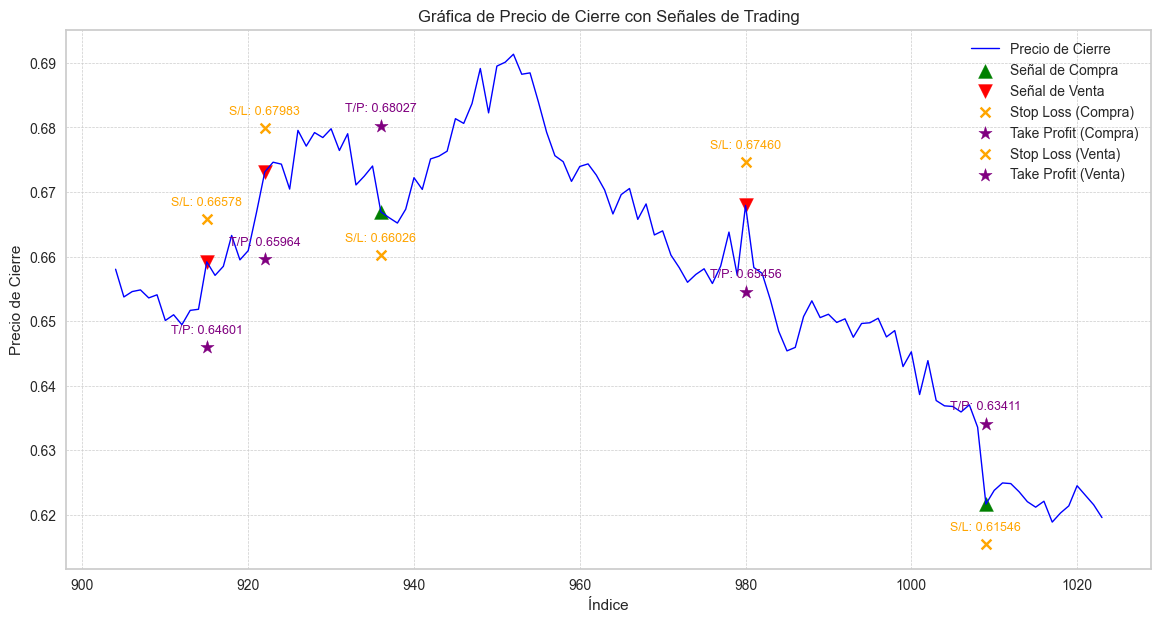

In [87]:
import pandas as pd
import matplotlib.pyplot as plt

# Filtrar los últimos 120 puntos
df_last_120 = df.tail(120)

# Crear la figura y los ejes
plt.figure(figsize=(14, 7))

# Graficar la columna 'close'
plt.plot(df_last_120['close'], label='Precio de Cierre', color='blue', linewidth=1)

# Graficar las señales de compra
buy_signals = df_last_120[df_last_120['filtered_buy_signal'] == 1]
plt.scatter(buy_signals.index, buy_signals['close'], marker='^', color='green', label='Señal de Compra', s=100)

# Graficar las señales de venta
sell_signals = df_last_120[df_last_120['filtered_sell_signal'] == -1]
plt.scatter(sell_signals.index, sell_signals['close'], marker='v', color='red', label='Señal de Venta', s=100)

# Graficar Stop Loss y Take Profit para las señales de compra
for i in buy_signals.index:
    plt.scatter(i, buy_signals.loc[i, 'stop_loss'], marker='x', color='orange', label='Stop Loss (Compra)', s=50)
    plt.annotate(f"S/L: {buy_signals.loc[i, 'stop_loss']:.5f}", 
                 (i, buy_signals.loc[i, 'stop_loss']),
                 textcoords="offset points", 
                 xytext=(0,10), 
                 ha='center', fontsize=9, color='orange')

    plt.scatter(i, buy_signals.loc[i, 'take_profit'], marker='*', color='purple', label='Take Profit (Compra)', s=100)
    plt.annotate(f"T/P: {buy_signals.loc[i, 'take_profit']:.5f}", 
                 (i, buy_signals.loc[i, 'take_profit']),
                 textcoords="offset points", 
                 xytext=(0,10), 
                 ha='center', fontsize=9, color='purple')

# Graficar Stop Loss y Take Profit para las señales de venta
for i in sell_signals.index:
    plt.scatter(i, sell_signals.loc[i, 'stop_loss'], marker='x', color='orange', label='Stop Loss (Venta)', s=50)
    plt.annotate(f"S/L: {sell_signals.loc[i, 'stop_loss']:.5f}", 
                 (i, sell_signals.loc[i, 'stop_loss']),
                 textcoords="offset points", 
                 xytext=(0,10), 
                 ha='center', fontsize=9, color='orange')

    plt.scatter(i, sell_signals.loc[i, 'take_profit'], marker='*', color='purple', label='Take Profit (Venta)', s=100)
    plt.annotate(f"T/P: {sell_signals.loc[i, 'take_profit']:.5f}", 
                 (i, sell_signals.loc[i, 'take_profit']),
                 textcoords="offset points", 
                 xytext=(0,10), 
                 ha='center', fontsize=9, color='purple')

# Etiquetas y leyenda
plt.title('Gráfica de Precio de Cierre con Señales de Trading')
plt.xlabel('Índice')
plt.ylabel('Precio de Cierre')

# Añadir cuadrícula
plt.grid(True, which='both', linestyle='--', linewidth=0.5)

# Ajustar la leyenda para evitar duplicados
handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys())

# Mostrar la gráfica
plt.show()


In [88]:
# Calcular la diferencia entre el valor actual y el valor anterior de 'close'
df['close_diff'] = df['close'].diff()

In [89]:
def generate_trading_signals(df, rsi_buy_threshold=30, rsi_sell_threshold=70, close_diff_multiplier=2):
    # Crear columnas 'buy_signal' y 'sell_signal' e inicializar en 0
    df['buy_signal'] = 0  # 1 para compra, 0 para ninguna
    df['sell_signal'] = 0  # -1 para venta, 0 para ninguna

    # Variables para verificar el estado de cada condición
    close_below_lower_band = False
    rsi_below_threshold = False
    rsi_above_avg = False
    close_above_upper_band = False
    rsi_above_threshold = False
    rsi_below_avg = False

    # Iterar sobre el DataFrame y calcular las señales
    for i in range(1, len(df)):
        # Condiciones de compra
        if df['filtered_buy_signal'].iloc[i] == 1:
            close_below_lower_band = True  # Activar cuando la señal filtrada de compra es 1
        
        if df['rsi'].iloc[i] <= rsi_buy_threshold:
            rsi_below_threshold = True
        if df['rsi'].iloc[i] >= rsi_sell_threshold:
            rsi_below_threshold = False  # Reseteo cuando rsi llega a 70
        
        if df['rsi'].iloc[i] > df['rsi_avg'].iloc[i]:
            rsi_above_avg = True
        if df['rsi'].iloc[i] < df['rsi_avg'].iloc[i]:
            rsi_above_avg = False  # Reseteo cuando rsi baja de rsi_avg

        # Activar señal de compra si todas las condiciones previas se cumplen
        if (close_below_lower_band and rsi_below_threshold and rsi_above_avg and
            abs(df['close_diff'].iloc[i]) >= close_diff_multiplier * abs(df['close_diff'].iloc[i - 1])):
            df.loc[i, 'buy_signal'] = 1  # Activar señal de compra
        
        # Condiciones de venta
        if df['filtered_sell_signal'].iloc[i] == -1:
            close_above_upper_band = True  # Activar cuando la señal filtrada de venta es -1
        
        if df['rsi'].iloc[i] >= rsi_sell_threshold:
            rsi_above_threshold = True
        if df['rsi'].iloc[i] <= rsi_buy_threshold:
            rsi_above_threshold = False  # Reseteo cuando rsi baja de 30
        
        if df['rsi'].iloc[i] < df['rsi_avg'].iloc[i]:
            rsi_below_avg = True
        if df['rsi'].iloc[i] > df['rsi_avg'].iloc[i]:
            rsi_below_avg = False  # Reseteo cuando rsi sube de rsi_avg

        # Activar señal de venta si todas las condiciones previas se cumplen
        if (close_above_upper_band and rsi_above_threshold and rsi_below_avg and
            abs(df['close_diff'].iloc[i]) >= close_diff_multiplier * abs(df['close_diff'].iloc[i - 1])):
            df.loc[i, 'sell_signal'] = -1  # Activar señal de venta

    return df



In [90]:
# Genera las señales
df = generate_trading_signals(df)
df

time     open     high      low    close  tick_volume  spread  \
0    2021-02-01  0.76189  0.76626  0.76058  0.76205       104719       0   
1    2021-02-02  0.76195  0.76618  0.75638  0.76082        85910       0   
2    2021-02-03  0.76066  0.76265  0.76016  0.76205        71325       0   
3    2021-02-04  0.76179  0.76477  0.75882  0.75999        67096       0   
4    2021-02-05  0.75995  0.76787  0.75829  0.76775        63978       0   
...         ...      ...      ...      ...      ...          ...     ...   
1019 2025-01-03  0.61965  0.62253  0.61912  0.62140       113529       0   
1020 2025-01-06  0.62062  0.63022  0.62016  0.62452       180283       0   
1021 2025-01-07  0.62345  0.62881  0.62277  0.62304       141545       0   
1022 2025-01-08  0.62269  0.62421  0.61874  0.62157       153783       0   
1023 2025-01-09  0.62052  0.62157  0.61719  0.61959        64747       0   

      real_volume  hour  day  ...  bullish_lower_band  bearish_upper_band  \
0               0     0    1  ...                 NaN                 NaN   
1               0     0    2  ...                 NaN                 NaN   
2               0     0    3  ...                 NaN                 NaN   
3               0     0    4  ...                 NaN                 NaN   
4               0     0    5  ...            0.760891                 NaN   
...           ...   ...  ...  ...                 ...                 ...   
1019            0     0    3  ...            0.619656            0.623043   
1020            0     0    6  ...            0.620031            0.623015   
1021            0     0    7  ...            0.620142            0.622415   
1022            0     0    8  ...            0.621955            0.623289   
1023            0     0    9  ...            0.619534            0.623116   

      bearish_lower_band  filtered_sell_signal  filtered_buy_signal  \
0                    NaN                     0                    0   
1                    NaN                     0                    0   
2                    NaN                     0                    0   
3                    NaN                     0                    0   
4                    NaN                     0                    0   
...                  ...                   ...                  ...   
1019            0.618521                     0                    0   
1020            0.619877                     0                    0   
1021            0.620845                     0                    0   
1022            0.621043                     0                    0   
1023            0.620932                     0                    0   

      entry_price  stop_loss  take_profit  position_size  close_diff  
0            None       None         None           None         NaN  
1            None       None         None           None    -0.00123  
2            None       None         None           None     0.00123  
3            None       None         None           None    -0.00206  
4            None       None         None           None     0.00776  
...           ...        ...          ...            ...         ...  
1019         None       None         None           None     0.00110  
1020         None       None         None           None     0.00312  
1021         None       None         None           None    -0.00148  
1022         None       None         None           None    -0.00147  
1023         None       None         None           None    -0.00198  

[1024 rows x 37 columns]

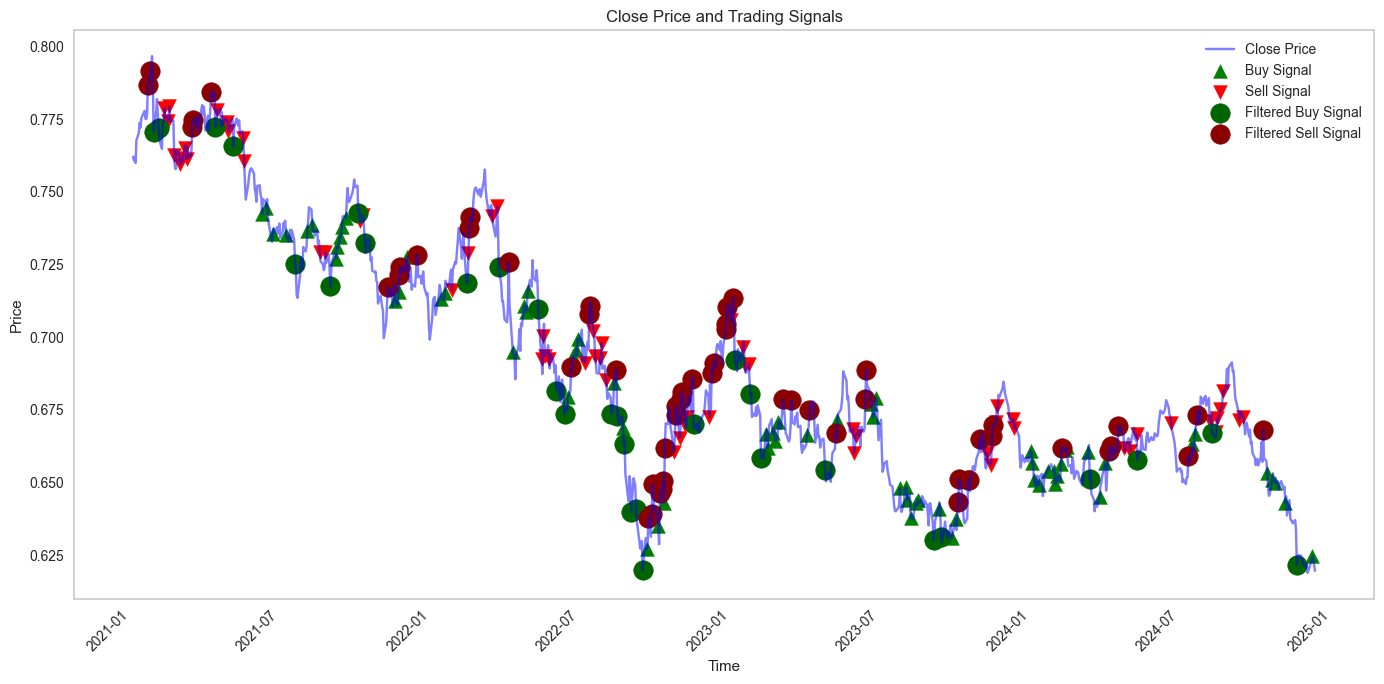

In [91]:
import matplotlib.pyplot as plt

def plot_close_and_signals(df):
    plt.figure(figsize=(14, 7))
    
    # Graficar el precio de cierre
    plt.plot(df['time'], df['close'], label='Close Price', color='blue', alpha=0.5)

    # Graficar señales de compra (1) y venta (-1)
    buy_signals = df[df['buy_signal'] == 1]
    sell_signals = df[df['sell_signal'] == -1]
    filtered_buy_signals = df[df['filtered_buy_signal'] == 1]
    filtered_sell_signals = df[df['filtered_sell_signal'] == -1]
    
    plt.scatter(buy_signals['time'], buy_signals['close'], label='Buy Signal', marker='^', color='green', s=100)
    plt.scatter(sell_signals['time'], sell_signals['close'], label='Sell Signal', marker='v', color='red', s=100)
    plt.scatter(filtered_buy_signals['time'], filtered_buy_signals['close'], label='Filtered Buy Signal', marker='o', color='darkgreen', s=200)
    plt.scatter(filtered_sell_signals['time'], filtered_sell_signals['close'], label='Filtered Sell Signal', marker='o', color='darkred', s=200)
    
    # Personalizar el gráfico
    plt.title('Close Price and Trading Signals')
    plt.xlabel('Time')
    plt.ylabel('Price')
    plt.legend()
    plt.grid()
    plt.xticks(rotation=45)
    
    plt.tight_layout()
    plt.show()

# Llamar a la función para graficar
plot_close_and_signals(df)


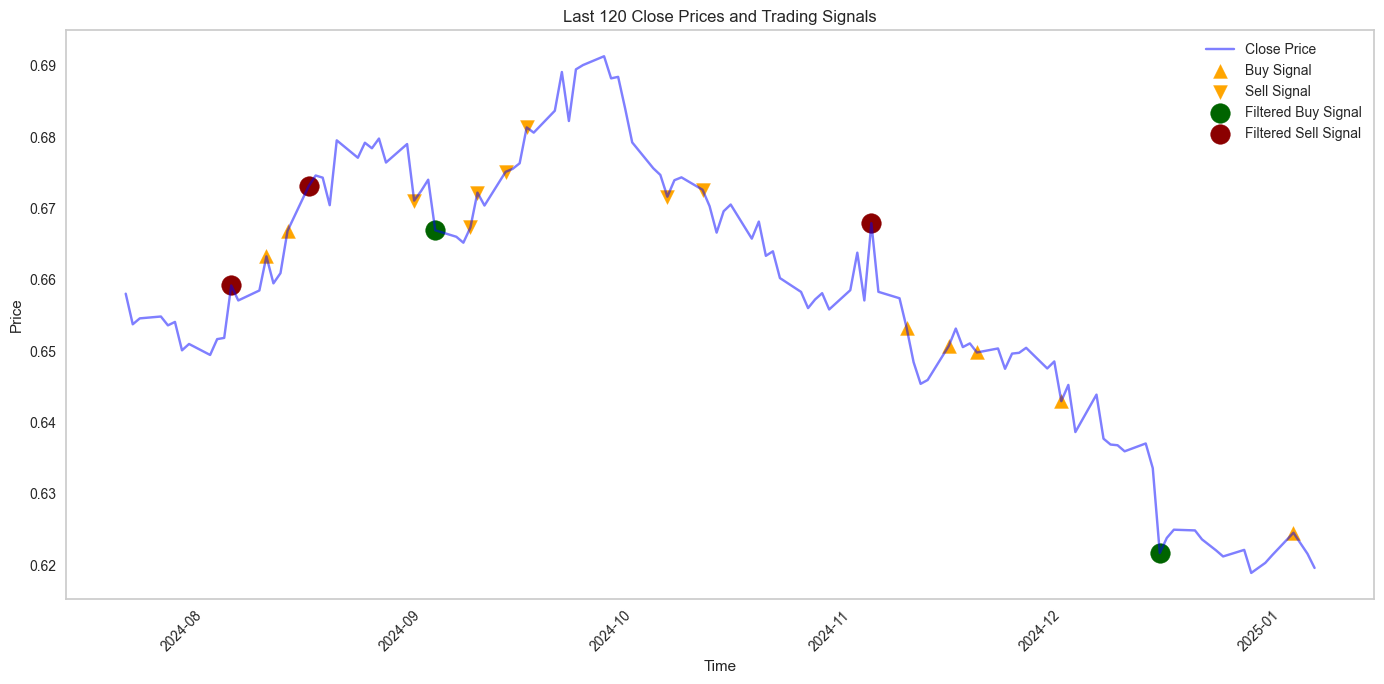

In [92]:
import matplotlib.pyplot as plt

def plot_last_120_points(df):
    # Seleccionar los últimos 120 puntos del DataFrame
    df_last_120 = df.tail(120)
    
    plt.figure(figsize=(14, 7))
    
    # Graficar el precio de cierre de los últimos 120 puntos
    plt.plot(df_last_120['time'], df_last_120['close'], label='Close Price', color='blue', alpha=0.5)

    # Graficar señales de compra (1) y venta (-1) para los últimos 120 puntos
    buy_signals = df_last_120[df_last_120['buy_signal'] == 1]
    sell_signals = df_last_120[df_last_120['sell_signal'] == -1]
    filtered_buy_signals = df_last_120[df_last_120['filtered_buy_signal'] == 1]
    filtered_sell_signals = df_last_120[df_last_120['filtered_sell_signal'] == -1]
    
    plt.scatter(buy_signals['time'], buy_signals['close'], label='Buy Signal', marker='^', color='orange', s=100)
    plt.scatter(sell_signals['time'], sell_signals['close'], label='Sell Signal', marker='v', color='orange', s=100)
    plt.scatter(filtered_buy_signals['time'], filtered_buy_signals['close'], label='Filtered Buy Signal', marker='o', color='darkgreen', s=200)
    plt.scatter(filtered_sell_signals['time'], filtered_sell_signals['close'], label='Filtered Sell Signal', marker='o', color='darkred', s=200)
    
    # Personalizar el gráfico
    plt.title('Last 120 Close Prices and Trading Signals')
    plt.xlabel('Time')
    plt.ylabel('Price')
    plt.legend()
    plt.grid()
    plt.xticks(rotation=45)
    
    plt.tight_layout()
    plt.show()

# Llamar a la función para graficar los últimos 120 puntos
plot_last_120_points(df)


In [93]:
import pandas as pd

# Supongamos que tu DataFrame es "df"
df['profit_loss'] = 0  # Inicializamos una columna para almacenar las ganancias/pérdidas

# Variables para rastrear la posición activa
position = None
entry_price = 0

# Recorrer cada fila y calcular las ganancias/pérdidas
for index, row in df.iterrows():
    if row['filtered_buy_signal'] == 1:  # Señal de compra
        position = 'long'
        entry_price = row['close']
    elif row['filtered_sell_signal'] == -1:  # Señal de venta
        position = 'short'
        entry_price = row['close']
    elif row['exit_buy_signal'] == 1 and position == 'long':  # Salir de compra
        df.loc[index, 'profit_loss'] = row['close'] - entry_price
        position = None
    elif row['exit_sell_signal'] == -1 and position == 'short':  # Salir de venta
        df.loc[index, 'profit_loss'] = entry_price - row['close']
        position = None

# Filtrar ganancias y pérdidas
gains = df['profit_loss'][df['profit_loss'] > 0]
losses = df['profit_loss'][df['profit_loss'] < 0]

# Calcular promedio de ganancias y pérdidas
average_gain = gains.mean() if not gains.empty else 0
average_loss = losses.mean() if not losses.empty else 0

# Mostrar resultados
print(f"Ganancia promedio: {average_gain:.2f}")
print(f"Pérdida promedio: {abs(average_loss):.2f}")


Ganancia promedio: 0.01
Pérdida promedio: 0.01


In [94]:
import pandas as pd

# Supongamos que ya tienes tu DataFrame `df` cargado y las señales definidas
# Capital inicial y parámetros de riesgo
capital_inicial = 100
porcentaje_riesgo = 0.02  # arriesgar el 2%
slope = 0.01  # Stop Loss al 1%
reward_ratio = 2  # relación 1:2 para el Take Profit

# Inicializa las columnas para precios de entrada, S/L y T/P
df['entry_price'] = None
df['stop_loss'] = None
df['take_profit'] = None
df['position_size'] = None

# Itera a través del DataFrame para establecer precios de entrada y calcular S/L y T/P
for index in range(len(df)):
    if df['buy_signal'].iloc[index]:  # Señal de compra
        df['entry_price'].iloc[index] = df['close'].iloc[index]
        df['stop_loss'].iloc[index] = df['entry_price'].iloc[index] * (1 - slope)  # S/L 1% por debajo
        df['take_profit'].iloc[index] = df['entry_price'].iloc[index] * (1 + (slope * reward_ratio))  # T/P 2% por encima
        # Calcular tamaño de posición
        risk_per_trade = df['entry_price'].iloc[index] - df['stop_loss'].iloc[index]
        df['position_size'].iloc[index] = (capital_inicial * porcentaje_riesgo) / risk_per_trade

    elif df['sell_signal'].iloc[index]:  # Señal de venta
        df['entry_price'].iloc[index] = df['close'].iloc[index]
        df['stop_loss'].iloc[index] = df['entry_price'].iloc[index] * (1 + slope)  # S/L 1% por encima
        df['take_profit'].iloc[index] = df['entry_price'].iloc[index] * (1 - (slope * reward_ratio))  # T/P 2% por debajo
        # Calcular tamaño de posición
        risk_per_trade = df['stop_loss'].iloc[index] - df['entry_price'].iloc[index]
        df['position_size'].iloc[index] = (capital_inicial * porcentaje_riesgo) / risk_per_trade

# Mostrar el DataFrame actualizado
df.tail()


time     open     high      low    close  tick_volume  spread  \
1019 2025-01-03  0.61965  0.62253  0.61912  0.62140       113529       0   
1020 2025-01-06  0.62062  0.63022  0.62016  0.62452       180283       0   
1021 2025-01-07  0.62345  0.62881  0.62277  0.62304       141545       0   
1022 2025-01-08  0.62269  0.62421  0.61874  0.62157       153783       0   
1023 2025-01-09  0.62052  0.62157  0.61719  0.61959        64747       0   

      real_volume  hour  day  ...  bullish_lower_band  bearish_upper_band  \
1019            0     0    3  ...            0.619656            0.623043   
1020            0     0    6  ...            0.620031            0.623015   
1021            0     0    7  ...            0.620142            0.622415   
1022            0     0    8  ...            0.621955            0.623289   
1023            0     0    9  ...            0.619534            0.623116   

      bearish_lower_band  filtered_sell_signal  filtered_buy_signal  \
1019            0.618521                     0                    0   
1020            0.619877                     0                    0   
1021            0.620845                     0                    0   
1022            0.621043                     0                    0   
1023            0.620932                     0                    0   

      entry_price  stop_loss  take_profit  position_size  close_diff  
1019         None       None         None           None     0.00110  
1020      0.62452   0.618275      0.63701     320.245949     0.00312  
1021         None       None         None           None    -0.00148  
1022         None       None         None           None    -0.00147  
1023         None       None         None           None    -0.00198  

[5 rows x 37 columns]

In [95]:
def plot_filtered_signals_with_sl_tp(df, take_profit_percentage=0.01, stop_loss_percentage=0.01):
    import matplotlib.pyplot as plt

    # Filtrar los últimos 120 puntos
    df_last_120 = df.tail(120)

    # Crear la figura y los ejes
    plt.figure(figsize=(14, 7))

    # Graficar la columna 'close'
    plt.plot(df_last_120['close'], label='Precio de Cierre', color='blue', linewidth=1)

    # Graficar las señales de compra filtradas
    filtered_buy_signals = df_last_120[df_last_120['filtered_buy_signal'] == 1]
    plt.scatter(filtered_buy_signals.index, filtered_buy_signals['close'], 
                marker='o', color='green', label='Señales de Compra Filtradas', s=100)

    # Graficar las señales de venta filtradas
    filtered_sell_signals = df_last_120[df_last_120['filtered_sell_signal'] == -1]
    plt.scatter(filtered_sell_signals.index, filtered_sell_signals['close'], 
                marker='o', color='red', label='Señales de Venta Filtradas', s=100)

    # Graficar las señales de compra
    buy_signals = df_last_120[df_last_120['buy_signal'] == 1]
    plt.scatter(buy_signals.index, buy_signals['close'], marker='^', color='orange', label='Señal de Compra', s=100)

    # Graficar las señales de venta
    sell_signals = df_last_120[df_last_120['sell_signal'] == -1]
    plt.scatter(sell_signals.index, sell_signals['close'], marker='v', color='orange', label='Señal de Venta', s=100)

    # Función para graficar Stop Loss y Take Profit
    def plot_sl_tp(signals, sl_multiplier, tp_multiplier, sl_color, tp_color, sl_label, tp_label):
        for i in signals.index:
            sl = signals.loc[i, 'close'] * sl_multiplier
            tp = signals.loc[i, 'close'] * tp_multiplier
            plt.scatter(i, sl, marker='x', color=sl_color, label=sl_label, s=50)
            plt.annotate(f"S/L: {sl:.5f}", 
                         (i, sl),
                         textcoords="offset points", 
                         xytext=(0, 10), 
                         ha='center', fontsize=9, color=sl_color)
            plt.scatter(i, tp, marker='*', color=tp_color, label=tp_label, s=100)
            plt.annotate(f"T/P: {tp:.5f}", 
                         (i, tp),
                         textcoords="offset points", 
                         xytext=(0, 10), 
                         ha='center', fontsize=9, color=tp_color)

    # Graficar SL/TP para señales filtradas de compra
    plot_sl_tp(filtered_buy_signals, 1 - stop_loss_percentage, 1 + take_profit_percentage, 'orange', 'purple', 
               'Stop Loss (Compra Filtrada)', 'Take Profit (Compra Filtrada)')

    # Graficar SL/TP para señales filtradas de venta
    plot_sl_tp(filtered_sell_signals, 1 + stop_loss_percentage, 1 - take_profit_percentage, 'orange', 'purple', 
               'Stop Loss (Venta Filtrada)', 'Take Profit (Venta Filtrada)')

    # Graficar SL/TP para señales de compra
    plot_sl_tp(buy_signals, 1 - stop_loss_percentage, 1 + take_profit_percentage, 'orange', 'purple', 
               'Stop Loss (Compra)', 'Take Profit (Compra)')

    # Graficar SL/TP para señales de venta
    plot_sl_tp(sell_signals, 1 + stop_loss_percentage, 1 - take_profit_percentage, 'orange', 'purple', 
               'Stop Loss (Venta)', 'Take Profit (Venta)')

    # Etiquetas y leyenda
    plt.title('Gráfica de Precio de Cierre con Señales de Trading Filtradas')
    plt.xlabel('Índice')
    plt.ylabel('Precio de Cierre')

    # Añadir cuadrícula
    plt.grid(True, which='both', linestyle='--', linewidth=0.5)

    # Ajustar la leyenda para evitar duplicados
    handles, labels = plt.gca().get_legend_handles_labels()
    by_label = dict(zip(labels, handles))
    plt.legend(by_label.values(), by_label.keys())

    # Mostrar la gráfica
    plt.show()


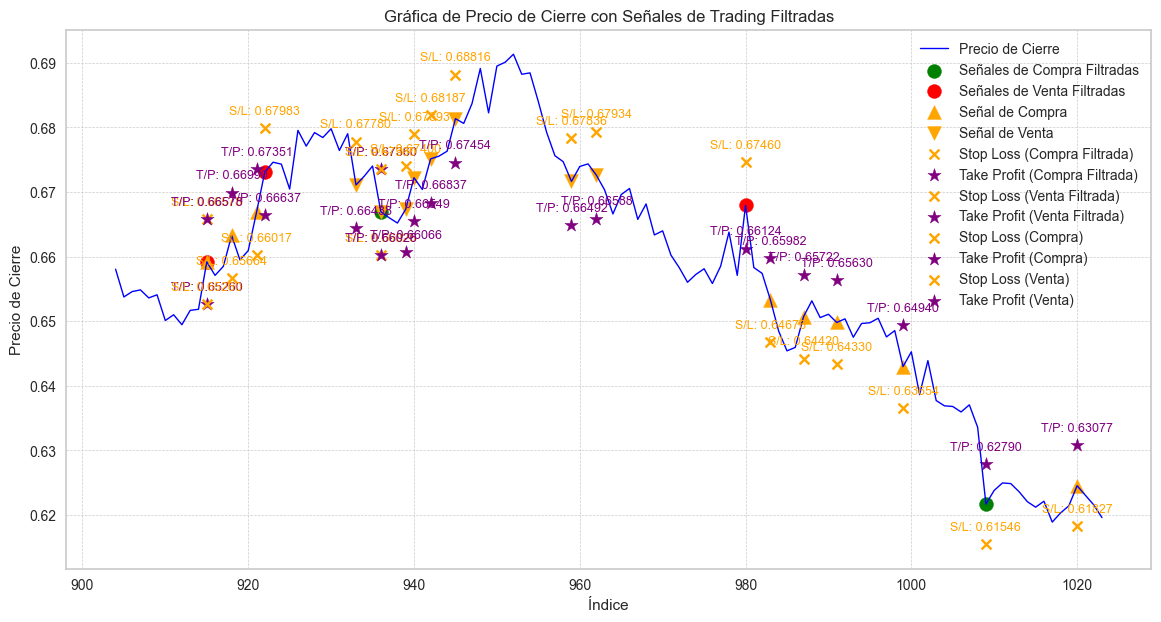

In [96]:
plot_filtered_signals_with_sl_tp(df, take_profit_percentage=0.01, stop_loss_percentage=0.01)

In [97]:
def plot_signals_with_sl_tp(df, take_profit_percentage=0.02, stop_loss_percentage=0.01):
    import matplotlib.pyplot as plt
    
    # Filtrar los últimos 120 puntos
    df_last_120 = df.tail(120)

    # Crear la figura y los ejes
    plt.figure(figsize=(14, 7))

    # Graficar la columna 'close'
    plt.plot(df_last_120['close'], label='Precio de Cierre', color='blue', linewidth=1)

    # Graficar las señales de compra
    buy_signals = df_last_120[df_last_120['buy_signal'] == 1]
    plt.scatter(buy_signals.index, buy_signals['close'], marker='^', color='orange', label='Señal de Compra', s=100)

    # Graficar las señales de venta
    sell_signals = df_last_120[df_last_120['sell_signal'] == -1]
    plt.scatter(sell_signals.index, sell_signals['close'], marker='v', color='orange', label='Señal de Venta', s=100)

    # Graficar las señales de compra filtradas
    filtered_buy_signals = df_last_120[df_last_120['filtered_buy_signal'] == 1].copy()
    plt.scatter(filtered_buy_signals.index, filtered_buy_signals['close'], marker='o', color='green', label='Señales de Compra Filtradas', s=100)

    # Graficar las señales de venta filtradas
    filtered_sell_signals = df_last_120[df_last_120['filtered_sell_signal'] == -1].copy()
    plt.scatter(filtered_sell_signals.index, filtered_sell_signals['close'], marker='o', color='red', label='Señales de Venta Filtradas', s=100)

    # Calcular y graficar Stop Loss y Take Profit para señales filtradas
    for signals, color, sl_multiplier, tp_multiplier, label_sl, label_tp in [
        (filtered_buy_signals, 'orange', 1 - stop_loss_percentage, 1 + take_profit_percentage, 'Stop Loss (Compra)', 'Take Profit (Compra)'),
        (filtered_sell_signals, 'red', 1 + stop_loss_percentage, 1 - take_profit_percentage, 'Stop Loss (Venta)', 'Take Profit (Venta)')
    ]:
        signals['stop_loss'] = signals['close'] * sl_multiplier
        signals['take_profit'] = signals['close'] * tp_multiplier
        
        for i in signals.index:
            sl = signals.loc[i, 'stop_loss']
            tp = signals.loc[i, 'take_profit']
            plt.scatter(i, sl, marker='x', color=color, label=label_sl, s=50)
            plt.annotate(f"S/L: {sl:.5f}", (i, sl), textcoords="offset points", xytext=(0, 10), ha='center', fontsize=9, color=color)
            plt.scatter(i, tp, marker='*', color='purple', label=label_tp, s=100)
            plt.annotate(f"T/P: {tp:.5f}", (i, tp), textcoords="offset points", xytext=(0, 10), ha='center', fontsize=9, color='purple')

    # Etiquetas y leyenda
    plt.title('Gráfica de Precio de Cierre con Señales de Trading Filtradas y S/L, T/P')
    plt.xlabel('Índice')
    plt.ylabel('Precio de Cierre')

    # Añadir cuadrícula
    plt.grid(True, which='both', linestyle='--', linewidth=0.5)

    # Ajustar la leyenda para evitar duplicados
    handles, labels = plt.gca().get_legend_handles_labels()
    by_label = dict(zip(labels, handles))
    plt.legend(by_label.values(), by_label.keys())

    # Mostrar la gráfica
    plt.show()


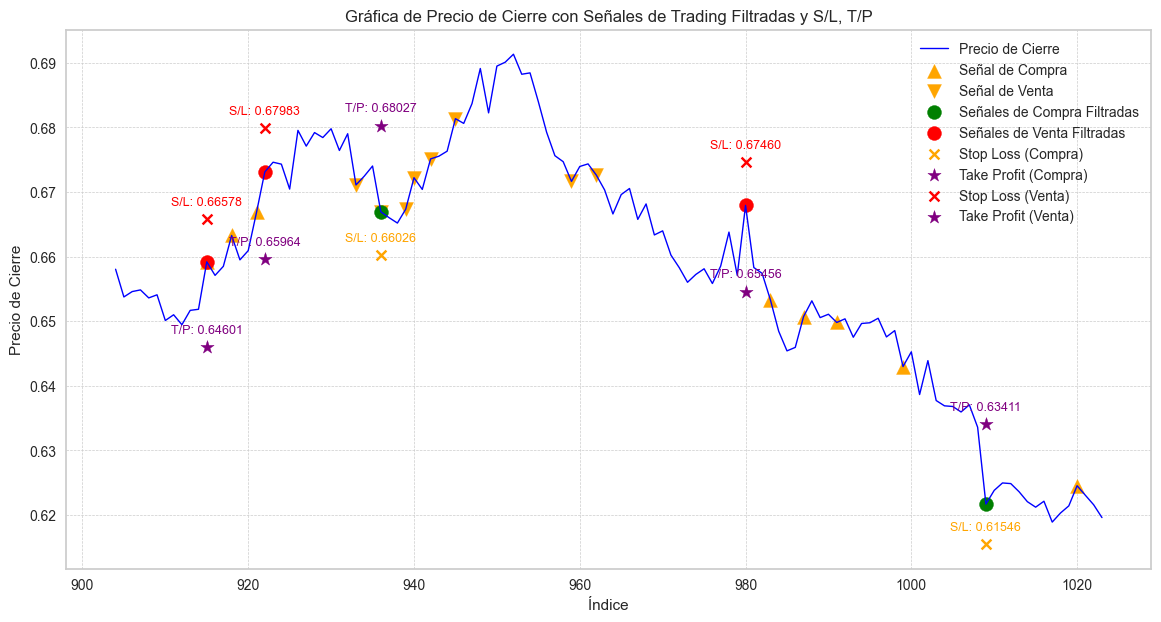

In [98]:
plot_signals_with_sl_tp(df, take_profit_percentage=0.02, stop_loss_percentage=0.01)

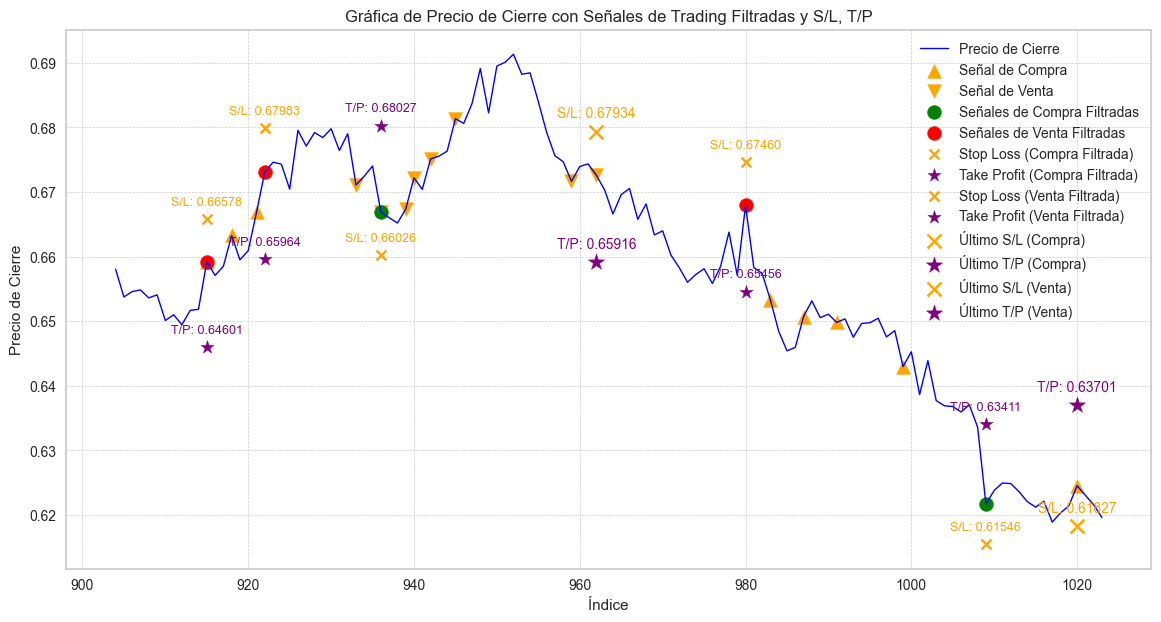

In [99]:
import pandas as pd
import matplotlib.pyplot as plt

# Filtrar los últimos 120 puntos
df_last_120 = df.tail(120)

# Parámetros para Take Profit y Stop Loss
take_profit_percentage = 0.02  # 2%
stop_loss_percentage = 0.01   # 1.5%

# Crear la figura y los ejes
plt.figure(figsize=(14, 7))

# Graficar la columna 'close'
plt.plot(df_last_120['close'], label='Precio de Cierre', color='blue', linewidth=1)

# Graficar las señales de compra
buy_signals = df_last_120[df_last_120['buy_signal'] == 1]
plt.scatter(buy_signals.index, buy_signals['close'], marker='^', color='orange', label='Señal de Compra', s=100)

# Graficar las señales de venta
sell_signals = df_last_120[df_last_120['sell_signal'] == -1]
plt.scatter(sell_signals.index, sell_signals['close'], marker='v', color='orange', label='Señal de Venta', s=100)

# Graficar las señales de compra filtradas
filtered_buy_signals = df_last_120[df_last_120['filtered_buy_signal'] == 1]
plt.scatter(filtered_buy_signals.index, filtered_buy_signals['close'], marker='o', color='green', label='Señales de Compra Filtradas', s=100)

# Graficar las señales de venta filtradas
filtered_sell_signals = df_last_120[df_last_120['filtered_sell_signal'] == -1]
plt.scatter(filtered_sell_signals.index, filtered_sell_signals['close'], marker='o', color='red', label='Señales de Venta Filtradas', s=100)

# Calcular Take Profit y Stop Loss para las señales de compra filtradas
filtered_buy_signals['stop_loss_flt'] = filtered_buy_signals['close'] * (1 - stop_loss_percentage)
filtered_buy_signals['take_profit_flt'] = filtered_buy_signals['close'] * (1 + take_profit_percentage)

# Graficar Stop Loss y Take Profit para las señales de compra filtradas
for i in filtered_buy_signals.index:
    sl = filtered_buy_signals.loc[i, 'stop_loss_flt']
    tp = filtered_buy_signals.loc[i, 'take_profit_flt']
    plt.scatter(i, sl, marker='x', color='orange', label='Stop Loss (Compra Filtrada)', s=50)
    plt.annotate(f"S/L: {sl:.5f}", 
                 (i, sl),
                 textcoords="offset points", 
                 xytext=(0, 10), 
                 ha='center', fontsize=9, color='orange')
    plt.scatter(i, tp, marker='*', color='purple', label='Take Profit (Compra Filtrada)', s=100)
    plt.annotate(f"T/P: {tp:.5f}", 
                 (i, tp),
                 textcoords="offset points", 
                 xytext=(0, 10), 
                 ha='center', fontsize=9, color='purple')

# Calcular Take Profit y Stop Loss para las señales de venta filtradas
filtered_sell_signals['stop_loss_flt'] = filtered_sell_signals['close'] * (1 + stop_loss_percentage)
filtered_sell_signals['take_profit_flt'] = filtered_sell_signals['close'] * (1 - take_profit_percentage)

# Graficar Stop Loss y Take Profit para las señales de venta filtradas
for i in filtered_sell_signals.index:
    sl = filtered_sell_signals.loc[i, 'stop_loss_flt']
    tp = filtered_sell_signals.loc[i, 'take_profit_flt']
    plt.scatter(i, sl, marker='x', color='orange', label='Stop Loss (Venta Filtrada)', s=50)
    plt.annotate(f"S/L: {sl:.5f}", 
                 (i, sl),
                 textcoords="offset points", 
                 xytext=(0, 10), 
                 ha='center', fontsize=9, color='orange')
    plt.scatter(i, tp, marker='*', color='purple', label='Take Profit (Venta Filtrada)', s=100)
    plt.annotate(f"T/P: {tp:.5f}", 
                 (i, tp),
                 textcoords="offset points", 
                 xytext=(0, 10), 
                 ha='center', fontsize=9, color='purple')
    
# Obtener el último S/L y T/P para compras
if not buy_signals.empty:
    last_buy_index = buy_signals.index[-1]
    last_buy_sl = buy_signals.loc[last_buy_index, 'stop_loss']
    last_buy_tp = buy_signals.loc[last_buy_index, 'take_profit']
    
    plt.scatter(last_buy_index, last_buy_sl, marker='x', color='orange', label='Último S/L (Compra)', s=100)
    plt.annotate(f"S/L: {last_buy_sl:.5f}", 
                 (last_buy_index, last_buy_sl),
                 textcoords="offset points", 
                 xytext=(0,10), 
                 ha='center', fontsize=10, color='orange')

    plt.scatter(last_buy_index, last_buy_tp, marker='*', color='purple', label='Último T/P (Compra)', s=150)
    plt.annotate(f"T/P: {last_buy_tp:.5f}", 
                 (last_buy_index, last_buy_tp),
                 textcoords="offset points", 
                 xytext=(0,10), 
                 ha='center', fontsize=10, color='purple')

# Obtener el último S/L y T/P para ventas
if not sell_signals.empty:
    last_sell_index = sell_signals.index[-1]
    last_sell_sl = sell_signals.loc[last_sell_index, 'stop_loss']
    last_sell_tp = sell_signals.loc[last_sell_index, 'take_profit']
    
    plt.scatter(last_sell_index, last_sell_sl, marker='x', color='orange', label='Último S/L (Venta)', s=100)
    plt.annotate(f"S/L: {last_sell_sl:.5f}", 
                 (last_sell_index, last_sell_sl),
                 textcoords="offset points", 
                 xytext=(0,10), 
                 ha='center', fontsize=10, color='orange')

    plt.scatter(last_sell_index, last_sell_tp, marker='*', color='purple', label='Último T/P (Venta)', s=150)
    plt.annotate(f"T/P: {last_sell_tp:.5f}", 
                 (last_sell_index, last_sell_tp),
                 textcoords="offset points", 
                 xytext=(0,10), 
                 ha='center', fontsize=10, color='purple')

# Etiquetas y leyenda
plt.title('Gráfica de Precio de Cierre con Señales de Trading Filtradas y S/L, T/P')
plt.xlabel('Índice')
plt.ylabel('Precio de Cierre')

# Añadir cuadrícula
plt.grid(True, which='both', linestyle='--', linewidth=0.5)

# Ajustar la leyenda para evitar duplicados
handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys())

# Mostrar la gráfica
plt.show()


In [100]:
# Importar librerías adicionales si es necesario
import numpy as np

# Configuración inicial
capital_inicial = 100
porcentaje_riesgo = 0.02
slope = 0.01
reward_ratio = 2
trailing_offset = 0.005  # Usar trailing stop de 0.5% de distancia inicial

# Actualiza tu DataFrame para las nuevas columnas de salida
df['trailing_stop'] = None
df['take_profit_partial'] = None

for index in range(len(df)):
    if df['buy_signal'].iloc[index]:  # Señal de compra
        entry_price = df['close'].iloc[index]
        df.at[index, 'entry_price'] = entry_price
        stop_loss = entry_price * (1 - slope)
        take_profit = entry_price * (1 + slope * reward_ratio)
        df.at[index, 'stop_loss'] = stop_loss
        df.at[index, 'take_profit'] = take_profit
        df.at[index, 'take_profit_partial'] = entry_price * (1 + slope * reward_ratio / 2)
        df.at[index, 'trailing_stop'] = stop_loss  # Inicializar el trailing stop al mismo nivel que el stop loss

        # Calcular tamaño de posición
        risk_per_trade = entry_price - stop_loss
        df.at[index, 'position_size'] = (capital_inicial * porcentaje_riesgo) / risk_per_trade

    elif df['sell_signal'].iloc[index]:  # Señal de venta
        entry_price = df['close'].iloc[index]
        df.at[index, 'entry_price'] = entry_price
        stop_loss = entry_price * (1 + slope)
        take_profit = entry_price * (1 - slope * reward_ratio)
        df.at[index, 'stop_loss'] = stop_loss
        df.at[index, 'take_profit'] = take_profit
        df.at[index, 'take_profit_partial'] = entry_price * (1 - slope * reward_ratio / 2)
        df.at[index, 'trailing_stop'] = stop_loss  # Inicializar el trailing stop al mismo nivel que el stop loss

        # Calcular tamaño de posición
        risk_per_trade = stop_loss - entry_price
        df.at[index, 'position_size'] = (capital_inicial * porcentaje_riesgo) / risk_per_trade

    # Actualizar el trailing stop si el precio se mueve favorablemente
    if df['buy_signal'].iloc[index] and df['entry_price'].iloc[index] is not None:
        # Actualizar el trailing stop si el precio actual es mayor al entry y alcanza la distancia del trailing stop
        current_price = df['close'].iloc[index]
        if current_price > df['entry_price'].iloc[index]:
            df.at[index, 'trailing_stop'] = max(df['trailing_stop'].iloc[index - 1] if index > 0 else stop_loss,
                                                current_price * (1 - trailing_offset))
    
    elif df['sell_signal'].iloc[index] and df['entry_price'].iloc[index] is not None:
        # Actualizar el trailing stop si el precio actual es menor al entry y alcanza la distancia del trailing stop
        current_price = df['close'].iloc[index]
        if current_price < df['entry_price'].iloc[index]:
            df.at[index, 'trailing_stop'] = min(df['trailing_stop'].iloc[index - 1] if index > 0 else stop_loss,
                                                current_price * (1 + trailing_offset))

# Mostrar el DataFrame actualizado
df.tail()


time     open     high      low    close  tick_volume  spread  \
1019 2025-01-03  0.61965  0.62253  0.61912  0.62140       113529       0   
1020 2025-01-06  0.62062  0.63022  0.62016  0.62452       180283       0   
1021 2025-01-07  0.62345  0.62881  0.62277  0.62304       141545       0   
1022 2025-01-08  0.62269  0.62421  0.61874  0.62157       153783       0   
1023 2025-01-09  0.62052  0.62157  0.61719  0.61959        64747       0   

      real_volume  hour  day  ...  bearish_lower_band  filtered_sell_signal  \
1019            0     0    3  ...            0.618521                     0   
1020            0     0    6  ...            0.619877                     0   
1021            0     0    7  ...            0.620845                     0   
1022            0     0    8  ...            0.621043                     0   
1023            0     0    9  ...            0.620932                     0   

      filtered_buy_signal  entry_price  stop_loss  take_profit  position_size  \
1019                    0         None       None         None           None   
1020                    0      0.62452   0.618275      0.63701     320.245949   
1021                    0         None       None         None           None   
1022                    0         None       None         None           None   
1023                    0         None       None         None           None   

      close_diff  trailing_stop  take_profit_partial  
1019     0.00110           None                 None  
1020     0.00312       0.618275             0.630765  
1021    -0.00148           None                 None  
1022    -0.00147           None                 None  
1023    -0.00198           None                 None  

[5 rows x 39 columns]

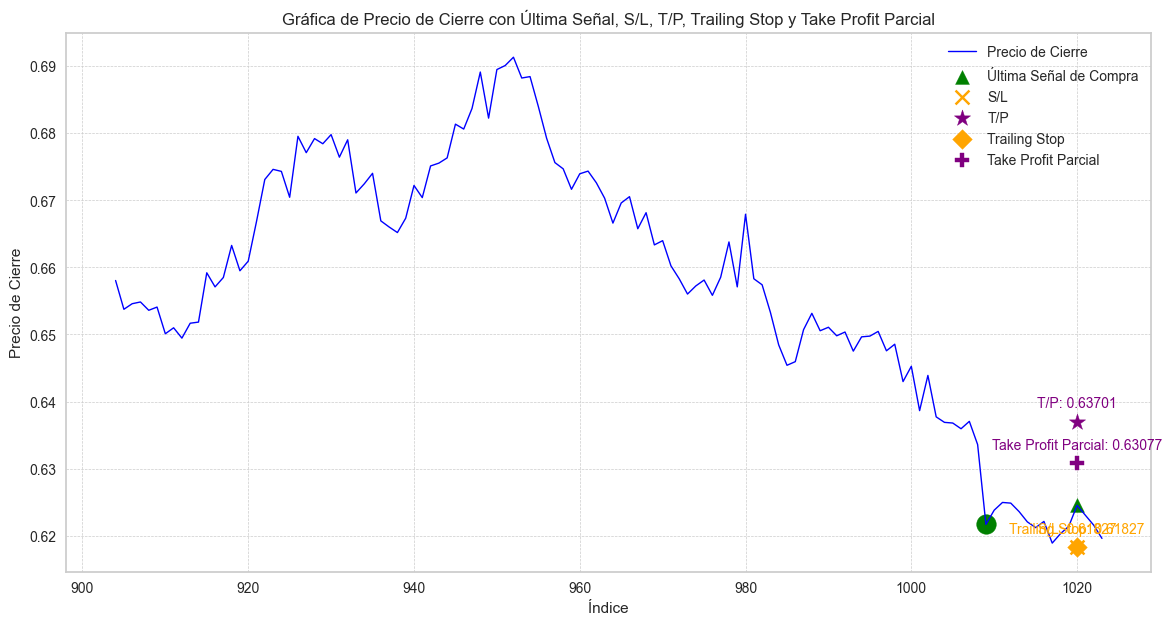

In [101]:
import pandas as pd
import matplotlib.pyplot as plt

# Filtrar los últimos 120 puntos
df_last_120 = df.tail(120).copy()

# Encontrar la última señal de compra o venta
last_signal = df_last_120[(df_last_120['buy_signal'] == 1) | (df_last_120['sell_signal'] == -1)].iloc[-1]

last_filtered_signal = df_last_120[(df_last_120['filtered_buy_signal'] == 1) | (df_last_120['filtered_sell_signal'] == -1)].iloc[-1]

# Crear la figura y los ejes
plt.figure(figsize=(14, 7))

# Graficar la columna 'close'
plt.plot(df_last_120.index, df_last_120['close'], label='Precio de Cierre', color='blue', linewidth=1)

# Graficar la última señal de compra o venta filtrada
if last_filtered_signal['filtered_buy_signal'] == 1:
    plt.scatter(last_filtered_signal.name, last_filtered_signal['close'], marker='o', color='green', label='Última Señal de Compra', s=200)
elif last_filtered_signal['filtered_sell_signal'] == -1:
    plt.scatter(last_filtered_signal.name, last_filtered_signal['close'], marker='o', color='red', label='Última Señal de Venta', s=200)

# Graficar la última señal de compra o venta no filtrada
if last_signal['buy_signal'] == 1:
    plt.scatter(last_signal.name, last_signal['close'], marker='^', color='green', label='Última Señal de Compra', s=100)
elif last_signal['sell_signal'] == -1:
    plt.scatter(last_signal.name, last_signal['close'], marker='v', color='red', label='Última Señal de Venta', s=100)

# Graficar el stop_loss, take_profit, trailing_stop, y take_profit_partial de la última señal
if pd.notnull(last_signal['stop_loss']):
    plt.scatter(last_signal.name, last_signal['stop_loss'], marker='x', color='orange', label=f'S/L', s=100)
    plt.annotate(f"S/L: {last_signal['stop_loss']:.5f}", 
                 (last_signal.name, last_signal['stop_loss']),
                 textcoords="offset points", 
                 xytext=(0,10), 
                 ha='center', fontsize=10, color='orange')

if pd.notnull(last_signal['take_profit']):
    plt.scatter(last_signal.name, last_signal['take_profit'], marker='*', color='purple', label=f'T/P', s=150)
    plt.annotate(f"T/P: {last_signal['take_profit']:.5f}", 
                 (last_signal.name, last_signal['take_profit']),
                 textcoords="offset points", 
                 xytext=(0,10), 
                 ha='center', fontsize=10, color='purple')

if pd.notnull(last_signal['trailing_stop']):
    plt.scatter(last_signal.name, last_signal['trailing_stop'], marker='D', color='orange', label=f'Trailing Stop', s=100)
    plt.annotate(f"Trailing Stop: {last_signal['trailing_stop']:.5f}", 
                 (last_signal.name, last_signal['trailing_stop']),
                 textcoords="offset points", 
                 xytext=(0,10), 
                 ha='center', fontsize=10, color='orange')

if pd.notnull(last_signal['take_profit_partial']):
    plt.scatter(last_signal.name, last_signal['take_profit_partial'], marker='P', color='purple', label=f'Take Profit Parcial', s=100)
    plt.annotate(f"Take Profit Parcial: {last_signal['take_profit_partial']:.5f}", 
                 (last_signal.name, last_signal['take_profit_partial']),
                 textcoords="offset points", 
                 xytext=(0,10), 
                 ha='center', fontsize=10, color='purple')

# Etiquetas y leyenda
plt.title('Gráfica de Precio de Cierre con Última Señal, S/L, T/P, Trailing Stop y Take Profit Parcial')
plt.xlabel('Índice')
plt.ylabel('Precio de Cierre')

# Añadir cuadrícula
plt.grid(True, which='both', linestyle='--', linewidth=0.5)

# Ajustar la leyenda para evitar duplicados
handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys())

# Mostrar la gráfica
plt.show()


In [102]:
def evaluate_signal(row, df):
    # Identificar señales de compra o venta
    if row['buy_signal'] == 1:
        signal_type = 'buy'
    elif row['sell_signal'] == -1:
        signal_type = 'sell'
    else:
        return np.nan  # Filas sin señal

    # Niveles definidos
    entry_price = row['entry_price']
    tp = row['take_profit_partial']  # Usar partial_take_profit en lugar de take_profit
    sl = row['stop_loss']

    # Validar que los niveles estén definidos
    if entry_price is None or tp is None or sl is None:
        return 'incomplete'

    # Evaluar el resultado basado en precios subsiguientes
    for i in range(row.name + 1, len(df)):
        next_close = df.loc[i, 'close']

        if signal_type == 'buy':
            if next_close >= tp:
                return 'win'
            elif next_close <= sl:
                return 'lose'

        elif signal_type == 'sell':
            if next_close <= tp:
                return 'win'
            elif next_close >= sl:
                return 'lose'

    # Si no se alcanzó ni SL ni TP, retornar pendiente
    return 'pending'

# Aplicar evaluación al DataFrame
df['result'] = df.apply(lambda row: evaluate_signal(row, df), axis=1)

# Contar todas las señales
total_buy_signals = df[df['buy_signal'] == 1].shape[0]
total_sell_signals = df[df['sell_signal'] == -1].shape[0]
win_count = df[df['result'] == 'win'].shape[0]
lose_count = df[df['result'] == 'lose'].shape[0]
incomplete_count = df[df['result'] == 'incomplete'].shape[0]
pending_count = df[df['result'] == 'pending'].shape[0]

# Contar señales ganadoras de compra y venta
win_buy_signals = df[(df['result'] == 'win') & (df['buy_signal'] == 1)].shape[0]
win_sell_signals = df[(df['result'] == 'win') & (df['sell_signal'] == -1)].shape[0]

# Calcular los porcentajes de señales ganadoras
win_buy_percentage = (win_buy_signals / total_buy_signals) * 100 if total_buy_signals > 0 else 0
win_sell_percentage = (win_sell_signals / total_sell_signals) * 100 if total_sell_signals > 0 else 0

# Validar la suma de resultados
total_evaluated_signals = win_count + lose_count + incomplete_count + pending_count
total_signals = total_buy_signals + total_sell_signals

# Mostrar resultados
print(f"Total señales de compra: {total_buy_signals}")
print(f"Total señales de venta: {total_sell_signals}")
print(f"Señales ganadoras: {win_count}")
print(f"Señales perdedoras: {lose_count}")
print(f"Señales incompletas: {incomplete_count}")
print(f"Señales pendientes: {pending_count}")
print(f"Total señales evaluadas: {total_evaluated_signals}")
print(f"Total señales esperadas: {total_signals}")
print(f"Porcentaje de señales de compra ganadoras: {win_buy_percentage:.2f}%")
print(f"Porcentaje de señales de venta ganadoras: {win_sell_percentage:.2f}%")

# Verificar si hay inconsistencia
if total_evaluated_signals != total_signals:
    print("Advertencia: Hay una inconsistencia en el conteo de señales. Verifica la lógica.")
else:
    print("El conteo de señales es consistente.")


Total señales de compra: 82
Total señales de venta: 70
Señales ganadoras: 83
Señales perdedoras: 68
Señales incompletas: 0
Señales pendientes: 1
Total señales evaluadas: 152
Total señales esperadas: 152
Porcentaje de señales de compra ganadoras: 56.10%
Porcentaje de señales de venta ganadoras: 52.86%
El conteo de señales es consistente.


In [103]:
def evaluate_signal(row, df):
    # Identificar señales de compra o venta
    if row['buy_signal'] == 1:
        signal_type = 'buy'
    elif row['sell_signal'] == -1:
        signal_type = 'sell'
    else:
        return np.nan  # Filas sin señal

    # Niveles definidos
    entry_price = row['entry_price']
    tp = row['take_profit_partial']  # Usar partial_take_profit en lugar de take_profit
    sl = row['stop_loss']

    # Validar que los niveles estén definidos
    if entry_price is None or tp is None or sl is None:
        return 'incomplete'

    # Evaluar el resultado basado en precios subsiguientes
    for i in range(row.name + 1, len(df)):
        next_close = df.loc[i, 'close']

        if signal_type == 'buy':
            if next_close >= tp:
                return 'win'
            elif next_close <= sl:
                return 'lose'

        elif signal_type == 'sell':
            if next_close <= tp:
                return 'win'
            elif next_close >= sl:
                return 'lose'

    # Si no se alcanzó ni SL ni TP, retornar pendiente
    return 'pending'


# Aplicar evaluación al DataFrame
df['result'] = df.apply(lambda row: evaluate_signal(row, df), axis=1)

# Identificar señales ganadoras y calcular el retroceso máximo
max_drawback_percentages = []

for idx, row in df.iterrows():
    if row['result'] == 'win':  # Solo procesar señales ganadoras
        entry_price = row['entry_price']
        tp = row['take_profit_partial']
        sl = row['stop_loss']

        # Evaluar el retroceso antes de que la señal se convirtiera en ganadora
        max_drawback = 0  # Inicializamos el retroceso máximo
        for i in range(idx + 1, len(df)):
            next_close = df.loc[i, 'close']

            # Calcular el retroceso máximo en porcentaje
            if row['buy_signal'] == 1:  # Señales de compra
                if next_close <= sl:
                    break  # Si toca el SL, no seguir
                # Calcular el retroceso máximo antes de alcanzar el TP
                drawback_percentage = (entry_price - next_close) / entry_price * 100
                max_drawback = max(max_drawback, drawback_percentage)

            elif row['sell_signal'] == -1:  # Señales de venta
                if next_close >= sl:
                    break  # Si toca el SL, no seguir
                # Calcular el retroceso máximo antes de alcanzar el TP
                drawback_percentage = (next_close - entry_price) / entry_price * 100
                max_drawback = max(max_drawback, drawback_percentage)

            # Si alcanzamos el TP, la señal es ganadora
            if next_close >= tp:
                break

        max_drawback_percentages.append(max_drawback)

# Calcular el promedio de retrocesos
if len(max_drawback_percentages) > 0:
    average_drawback_percentage = np.mean(max_drawback_percentages)
else:
    average_drawback_percentage = 0

# Mostrar resultados
print(f"Promedio porcentual de retroceso máximo antes de alcanzar la señal ganadora: {average_drawback_percentage:.2f}%")


Promedio porcentual de retroceso máximo antes de alcanzar la señal ganadora: 0.16%


In [104]:
# Ajustar el stop_loss en función del retroceso máximo
def adjust_stop_loss(row, max_drawback_percentage):
    entry_price = row['entry_price']
    stop_loss = row['stop_loss']
    
    if entry_price is None or stop_loss is None:
        return stop_loss  # No ajustar si no hay precios definidos
    
    # Calcular el nuevo stop_loss ajustado basado en el retroceso máximo
    # Aquí ajustamos el stop_loss en un 50% del retroceso máximo promedio
    adjusted_stop_loss = stop_loss + (max_drawback_percentage/ 100) * entry_price

    return adjusted_stop_loss

# Aplicar el ajuste de stop_loss directamente en la columna existente
df['stop_loss'] = df.apply(lambda row: adjust_stop_loss(row, average_drawback_percentage), axis=1)

# Mostrar los primeros registros para verificar el ajuste
print(df[['entry_price', 'stop_loss']].head())


  entry_price  stop_loss
0        None        NaN
1        None        NaN
2        None        NaN
3        None        NaN
4        None        NaN


In [105]:
import pandas as pd
import matplotlib.pyplot as plt

def plot_signals_with_sl_tp2(df, last_n_points=120):
    """
    Grafica señales de compra y venta, junto con S/L y T/P para los últimos puntos de datos.

    Parámetros:
        df (pd.DataFrame): DataFrame con las columnas 'close', 'buy_signal', 'sell_signal', 
                           'filtered_buy_signal', 'filtered_sell_signal', 'stop_loss', y 'take_profit'.
        last_n_points (int): Número de puntos a incluir en la gráfica.
    """
    # Filtrar los últimos puntos
    df_last_n = df.tail(last_n_points)

    # Crear la figura
    plt.figure(figsize=(14, 7))

    # Graficar la columna 'close'
    plt.plot(df_last_n['close'], label='Precio de Cierre', color='blue', linewidth=1)

    # Graficar las señales de compra
    buy_signals = df_last_n[df_last_n['buy_signal'] == 1]
    plt.scatter(buy_signals.index, buy_signals['close'], marker='^', color='green', label='Señal de Compra', s=100)

    # Graficar las señales de venta
    sell_signals = df_last_n[df_last_n['sell_signal'] == -1]
    plt.scatter(sell_signals.index, sell_signals['close'], marker='v', color='red', label='Señal de Venta', s=100)

    # Graficar señales filtradas
    filtered_signals = df_last_n[(df_last_n['filtered_buy_signal'] == 1) | (df_last_n['filtered_sell_signal'] == -1)]
    filtered_buy_signals = filtered_signals[filtered_signals['filtered_buy_signal'] == 1]
    plt.scatter(filtered_buy_signals.index, filtered_buy_signals['close'], marker='o', color='darkgreen', label='Señales de Compra Filtradas', s=200)

    filtered_sell_signals = filtered_signals[filtered_signals['filtered_sell_signal'] == -1]
    plt.scatter(filtered_sell_signals.index, filtered_sell_signals['close'], marker='o', color='darkred', label='Señales de Venta Filtradas', s=200)

    # Últimos S/L y T/P para compras
    if not buy_signals.empty:
        last_buy_index = buy_signals.index[-1]
        last_buy_sl = buy_signals.loc[last_buy_index, 'stop_loss']
        last_buy_tp = buy_signals.loc[last_buy_index, 'take_profit']

        plt.scatter(last_buy_index, last_buy_sl, marker='x', color='orange', label='Último S/L (Compra)', s=100)
        plt.annotate(f"S/L: {last_buy_sl:.5f}", (last_buy_index, last_buy_sl), textcoords="offset points", xytext=(0, 10), ha='center', fontsize=10, color='orange')
        plt.scatter(last_buy_index, last_buy_tp, marker='*', color='purple', label='Último T/P (Compra)', s=150)
        plt.annotate(f"T/P: {last_buy_tp:.5f}", (last_buy_index, last_buy_tp), textcoords="offset points", xytext=(0, 10), ha='center', fontsize=10, color='purple')

    # Últimos S/L y T/P para ventas
    if not sell_signals.empty:
        last_sell_index = sell_signals.index[-1]
        last_sell_sl = sell_signals.loc[last_sell_index, 'stop_loss']
        last_sell_tp = sell_signals.loc[last_sell_index, 'take_profit']

        plt.scatter(last_sell_index, last_sell_sl, marker='x', color='orange', label='Último S/L (Venta)', s=100)
        plt.annotate(f"S/L: {last_sell_sl:.5f}", (last_sell_index, last_sell_sl), textcoords="offset points", xytext=(0, 10), ha='center', fontsize=10, color='orange')
        plt.scatter(last_sell_index, last_sell_tp, marker='*', color='purple', label='Último T/P (Venta)', s=150)
        plt.annotate(f"T/P: {last_sell_tp:.5f}", (last_sell_index, last_sell_tp), textcoords="offset points", xytext=(0, 10), ha='center', fontsize=10, color='purple')

    # Etiquetas y leyenda
    plt.title('Gráfica de Precio de Cierre con Señales Filtradas y Últimos S/L y T/P')
    plt.xlabel('Índice')
    plt.ylabel('Precio de Cierre')
    plt.grid(True, which='both', linestyle='--', linewidth=0.5)

    # Ajustar la leyenda para evitar duplicados
    handles, labels = plt.gca().get_legend_handles_labels()
    by_label = dict(zip(labels, handles))
    plt.legend(by_label.values(), by_label.keys())

    # Mostrar la gráfica
    plt.show()


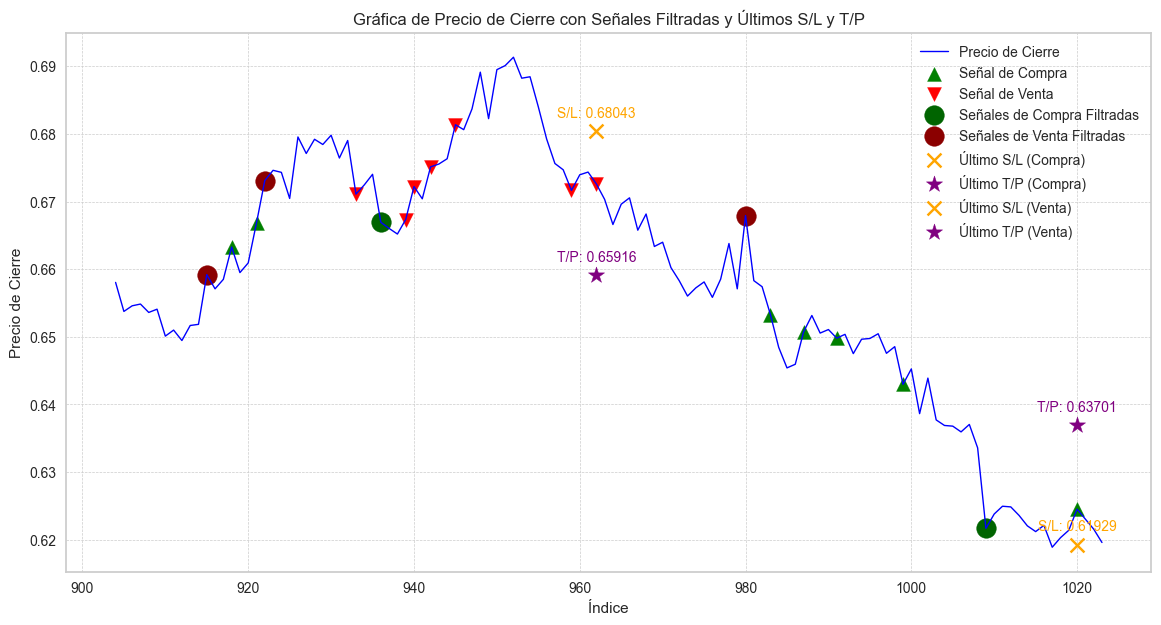

In [106]:
# Asumiendo que 'df' contiene tus datos
plot_signals_with_sl_tp2(df)

In [107]:
# Función para evaluar señales y calcular retrocesos antes de ganar
def evaluate_signal_max_gain(row, df):
    # Identificar señales de compra o venta
    if row['buy_signal'] == 1:
        signal_type = 'buy'
    elif row['sell_signal'] == -1:
        signal_type = 'sell'
    else:
        return np.nan  # Filas sin señal

    # Niveles definidos
    entry_price = row['entry_price']
    tp = row['take_profit']  # Usar partial_take_profit en lugar de take_profit
    sl = row['stop_loss']

    # Validar que los niveles estén definidos
    if entry_price is None or tp is None or sl is None:
        return 'incomplete'

    # Evaluar el resultado basado en precios subsiguientes
    for i in range(row.name + 1, len(df)):
        next_close = df.loc[i, 'close']

        if signal_type == 'buy':
            if next_close >= tp:
                return 'win'
            elif next_close <= sl:
                return 'lose'

        elif signal_type == 'sell':
            if next_close <= tp:
                return 'win'
            elif next_close >= sl:
                return 'lose'

    # Si no se alcanzó ni SL ni TP, retornar pendiente
    return 'pending'


# Aplicar evaluación al DataFrame
df['result'] = df.apply(lambda row: evaluate_signal_max_gain(row, df), axis=1)

# Identificar señales ganadoras y calcular el retroceso máximo
max_drawback_percentages = []
max_gain_percentages = []  # Para guardar los porcentajes de ganancias máximas

for idx, row in df.iterrows():
    if row['result'] == 'win':  # Solo procesar señales ganadoras
        entry_price = row['entry_price']
        tp = row['take_profit']
        sl = row['stop_loss']

        # Inicializamos retrocesos y ganancias
        max_drawback = 0  
        max_gain = 0  # Para ganar el máximo porcentaje

        for i in range(idx + 1, len(df)):
            next_close = df.loc[i, 'close']

            # Para señales de compra
            if row['buy_signal'] == 1:
                if next_close <= sl:
                    break  # Si toca el SL, no seguir
                drawback_percentage = (entry_price - next_close) / entry_price * 100
                max_drawback = max(max_drawback, drawback_percentage)
                # Calcular el porcentaje de ganancia
                if next_close >= tp:
                    max_gain = (next_close - entry_price) / entry_price * 100
                    break

            # Para señales de venta
            elif row['sell_signal'] == -1:
                if next_close >= sl:
                    break  # Si toca el SL, no seguir
                drawback_percentage = (next_close - entry_price) / entry_price * 100
                max_drawback = max(max_drawback, drawback_percentage)
                # Calcular el porcentaje de ganancia
                if next_close <= tp:
                    max_gain = (entry_price - next_close) / entry_price * 100
                    break

        max_drawback_percentages.append(max_drawback)
        max_gain_percentages.append(max_gain)

# Calcular el promedio de retrocesos y ganancias
average_drawback_percentage = np.mean(max_drawback_percentages) if len(max_drawback_percentages) > 0 else 0
average_gain_percentage = np.mean(max_gain_percentages) if len(max_gain_percentages) > 0 else 0

# Mostrar resultados
print(f"Promedio porcentual de retroceso máximo antes de alcanzar la señal ganadora: {average_drawback_percentage:.2f}%")
print(f"Promedio porcentual de ganancia máxima alcanzada: {average_gain_percentage:.2f}%")

# Ajustar el TP para maximizar las ganancias
#def adjust_take_profit(row, average_gain_percentage):
    # Aumentamos el TP en función de la ganancia máxima promedio observada
    #entry_price = row['entry_price']
    #tp = row['take_profit']
    
    #if entry_price is None or tp is None:
        #return tp  # No ajustar si no hay precios definidos
    
    # Calcular el nuevo TP ajustado para maximizar ganancias
    #adjusted_tp = tp + (average_gain_percentage / 100) * entry_price
    #return adjusted_tp

# Aplicar ajuste al TP directamente en la columna existente
#df['take_profit'] = df.apply(lambda row: adjust_take_profit(row, average_gain_percentage), axis=1)

# Mostrar los primeros registros para verificar el ajuste
#print(df[['entry_price', 'take_profit']].head())


Promedio porcentual de retroceso máximo antes de alcanzar la señal ganadora: 0.24%
Promedio porcentual de ganancia máxima alcanzada: 2.35%


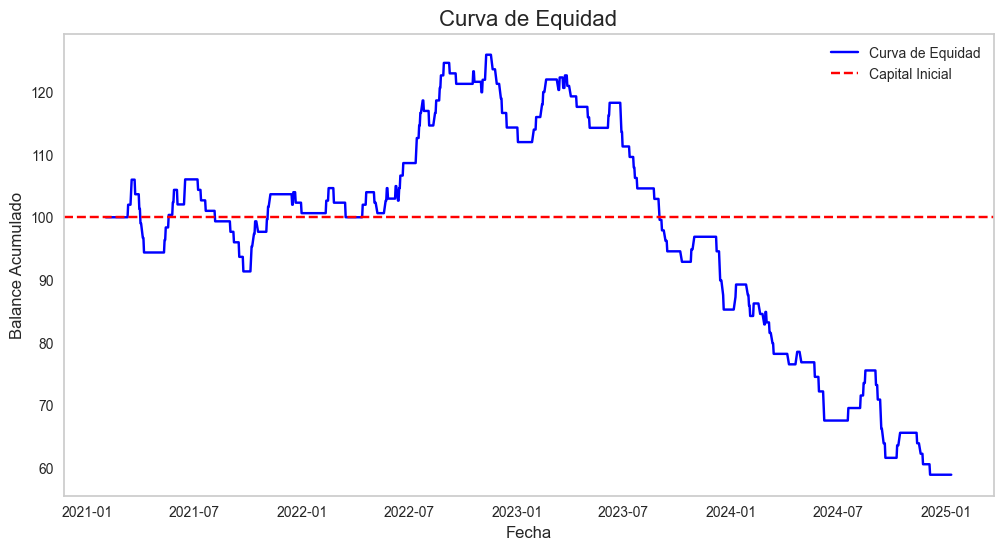

In [108]:
import matplotlib.pyplot as plt

# Definir el balance inicial
initial_balance = 100  # Capital inicial

# Calcular la ganancia/pérdida para cada operación
def calculate_profit_or_loss(row):
    if row['result'] == 'win':
        return (row['take_profit_partial'] - row['entry_price']) * row['position_size'] if row['buy_signal'] == 1 else \
               (row['entry_price'] - row['take_profit_partial']) * row['position_size']
    elif row['result'] == 'lose':
        return (row['stop_loss'] - row['entry_price']) * row['position_size'] if row['buy_signal'] == 1 else \
               (row['entry_price'] - row['stop_loss']) * row['position_size']
    else:
        return 0  # Ignorar pendientes

# Aplicar la función para calcular la ganancia/pérdida por operación
df['profit_loss'] = df.apply(calculate_profit_or_loss, axis=1)

# Calcular el balance acumulado
df['equity'] = initial_balance + df['profit_loss'].cumsum()

# Graficar la curva de equidad
plt.figure(figsize=(12, 6))
plt.plot(df['time'], df['equity'], label='Curva de Equidad', color='blue')
plt.axhline(initial_balance, color='red', linestyle='--', label='Capital Inicial')
plt.title('Curva de Equidad', fontsize=16)
plt.xlabel('Fecha', fontsize=12)
plt.ylabel('Balance Acumulado', fontsize=12)
plt.legend()
plt.grid()
plt.show()


Promedio de días para alcanzar el take profit en operaciones ganadoras de compra: 4.63 días
Promedio de días para alcanzar el take profit en operaciones ganadoras de venta: 6.18 días


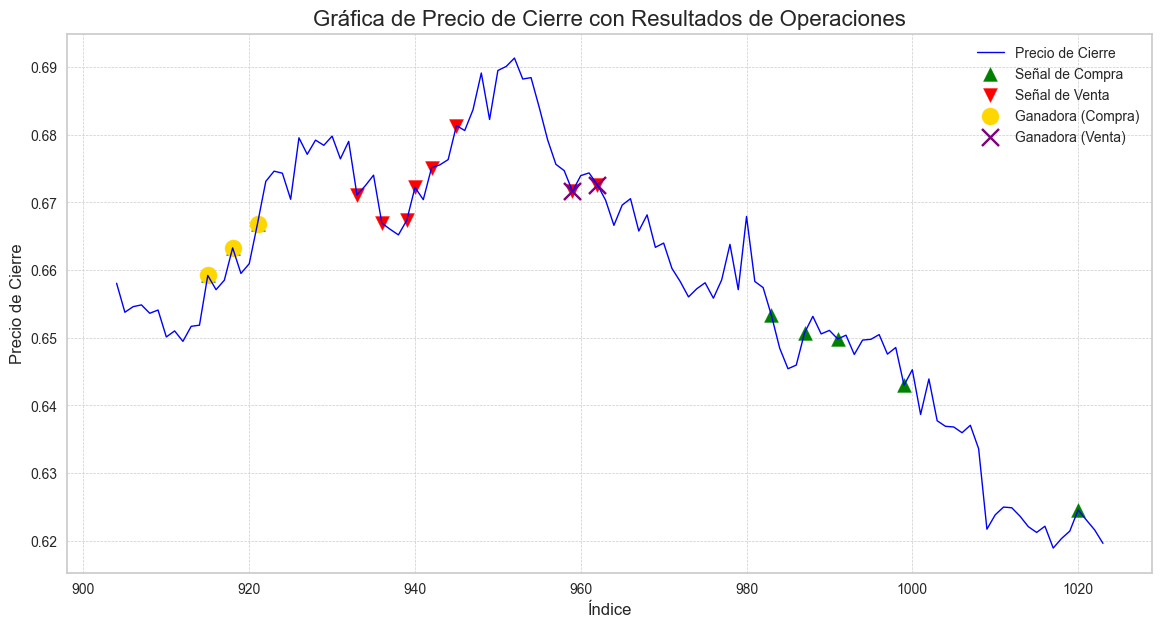

In [109]:
# Función para evaluar cada operación y calcular días hasta alcanzar TP
def evaluate_trade_with_days(row, df):
    if row['buy_signal'] == 1:  # Compra
        for i in range(row.name + 1, len(df)):
            next_close = df.loc[i, 'close']
            if next_close >= row['take_profit_partial']:
                return {'result': 'win', 'days_to_tp': i - row.name, 'trade_type': 'buy'}  # Ganadora compra
            elif next_close <= row['stop_loss']:
                return {'result': 'lose', 'days_to_tp': np.nan, 'trade_type': 'buy'}  # Perdida compra
    elif row['sell_signal'] == -1:  # Venta
        for i in range(row.name + 1, len(df)):
            next_close = df.loc[i, 'close']
            if next_close <= row['take_profit_partial']:
                return {'result': 'win', 'days_to_tp': i - row.name, 'trade_type': 'sell'}  # Ganadora venta
            elif next_close >= row['stop_loss']:
                return {'result': 'lose', 'days_to_tp': np.nan, 'trade_type': 'sell'}  # Perdida venta
    return {'result': 'pending', 'days_to_tp': np.nan, 'trade_type': None}  # Operación pendiente

# Evaluar todas las operaciones y agregar columnas de resultados, días y tipo de operación
df[['result', 'days_to_tp', 'trade_type']] = df.apply(
    lambda row: pd.Series(evaluate_trade_with_days(row, df)), axis=1
)

# Filtrar operaciones ganadoras
winning_trades = df[df['result'] == 'win']

# Separar operaciones ganadoras por tipo de operación
winning_buy_trades = winning_trades[winning_trades['trade_type'] == 'buy']
winning_sell_trades = winning_trades[winning_trades['trade_type'] == 'sell']

# Calcular el promedio de días para alcanzar el TP en compras y ventas
average_days_to_tp_buy = winning_buy_trades['days_to_tp'].mean()
average_days_to_tp_sell = winning_sell_trades['days_to_tp'].mean()

# Mostrar resultados
print(f"Promedio de días para alcanzar el take profit en operaciones ganadoras de compra: {average_days_to_tp_buy:.2f} días")
print(f"Promedio de días para alcanzar el take profit en operaciones ganadoras de venta: {average_days_to_tp_sell:.2f} días")

# Filtrar los últimos 120 puntos para la gráfica
df_last_120 = df.tail(120)

# Gráfica de los precios
plt.figure(figsize=(14, 7))
plt.plot(df_last_120['close'], label='Precio de Cierre', color='blue', linewidth=1)

# Señales de compra
buy_signals = df_last_120[df_last_120['buy_signal'] == 1]
plt.scatter(buy_signals.index, buy_signals['close'], marker='^', color='green', label='Señal de Compra', s=100)

# Señales de venta
sell_signals = df_last_120[df_last_120['sell_signal'] == -1]
plt.scatter(sell_signals.index, sell_signals['close'], marker='v', color='red', label='Señal de Venta', s=100)

# Operaciones ganadoras de compra
winning_buy_trades_last_120 = df_last_120[(df_last_120['result'] == 'win') & (df_last_120['trade_type'] == 'buy')]
plt.scatter(winning_buy_trades_last_120.index, winning_buy_trades_last_120['close'], marker='o', color='gold', label='Ganadora (Compra)', s=150)

# Operaciones ganadoras de venta
winning_sell_trades_last_120 = df_last_120[(df_last_120['result'] == 'win') & (df_last_120['trade_type'] == 'sell')]
plt.scatter(winning_sell_trades_last_120.index, winning_sell_trades_last_120['close'], marker='x', color='purple', label='Ganadora (Venta)', s=150)

# Etiquetas y personalización
plt.title('Gráfica de Precio de Cierre con Resultados de Operaciones', fontsize=16)
plt.xlabel('Índice', fontsize=12)
plt.ylabel('Precio de Cierre', fontsize=12)
plt.legend()
plt.grid(True, linestyle='--', linewidth=0.5)

# Mostrar la gráfica
plt.show()


In [110]:
# Función para evaluar cada operación y calcular días hasta alcanzar TP
def evaluate_trade_with_days(row, df):
    if row['buy_signal'] == 1:  # Compra
        for i in range(row.name + 1, len(df)):
            next_close = df.loc[i, 'close']
            if next_close >= row['take_profit_partial']:
                return {'result': 'win', 'days_to_tp': i - row.name}  # Ganadora con días
            elif next_close <= row['stop_loss']:
                return {'result': 'lose', 'days_to_tp': np.nan}  # Perdida, sin días
    elif row['sell_signal'] == -1:  # Venta
        for i in range(row.name + 1, len(df)):
            next_close = df.loc[i, 'close']
            if next_close <= row['take_profit_partial']:
                return {'result': 'win', 'days_to_tp': i - row.name}  # Ganadora con días
            elif next_close >= row['stop_loss']:
                return {'result': 'lose', 'days_to_tp': np.nan}  # Perdida, sin días
    return {'result': 'pending', 'days_to_tp': np.nan}  # Operación pendiente

# Evaluar todas las operaciones y agregar columnas de resultados y días
df[['result', 'days_to_tp']] = df.apply(
    lambda row: pd.Series(evaluate_trade_with_days(row, df)), axis=1
)

# Filtrar operaciones ganadoras
winning_trades = df[df['result'] == 'win']

# Calcular el número promedio de días hasta alcanzar el TP
average_days_to_tp = winning_trades['days_to_tp'].mean()

# Mostrar el resultado
print(f"Promedio de días para alcanzar el take profit en operaciones ganadoras: {average_days_to_tp:.2f} días")




Promedio de días para alcanzar el take profit en operaciones ganadoras: 5.36 días


In [111]:
data= df

In [112]:
from pycaret.classification import *
s = setup(data, target = 'result', session_id = 123)

In [113]:
best = compare_models()

In [114]:
boosted = ensemble_model(best, method = 'Bagging')

In [115]:
print(boosted)

BaggingClassifier(base_estimator='deprecated', bootstrap=True,
                  bootstrap_features=False,
                  estimator=RidgeClassifier(alpha=1.0, class_weight=None,
                                            copy_X=True, fit_intercept=True,
                                            max_iter=None, positive=False,
                                            random_state=123, solver='auto',
                                            tol=0.0001),
                  max_features=1.0, max_samples=1.0, n_estimators=10,
                  n_jobs=None, oob_score=False, random_state=123, verbose=0,
                  warm_start=False)


In [116]:
evaluate_model(boosted)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

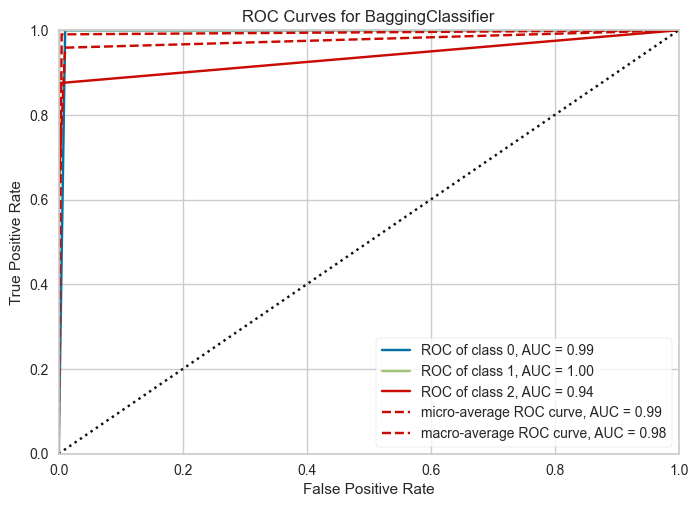

In [117]:
plot_model(boosted, plot = 'auc')

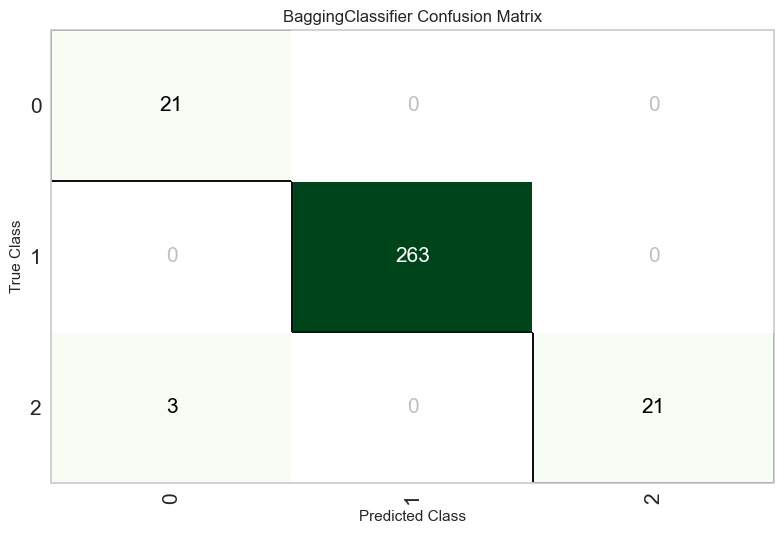

In [118]:
plot_model(boosted, plot = 'confusion_matrix')

In [119]:
predict_model(boosted)

time     open     high      low    close  tick_volume  spread  \
463  2022-11-10  0.64286  0.66314  0.63864  0.66188       132333       0   
453  2022-10-27  0.64959  0.65219  0.64257  0.64520       120128       0   
164  2021-09-17  0.72895  0.73216  0.72621  0.72621        49417       0   
337  2022-05-18  0.70256  0.70464  0.69495  0.69527        83000       0   
30   2021-03-15  0.77500  0.77755  0.77058  0.77553        81790       0   
...         ...      ...      ...      ...      ...          ...     ...   
47   2021-04-07  0.76588  0.76771  0.76006  0.76117        70952       0   
258  2022-01-27  0.71127  0.71214  0.70237  0.70340        80183       0   
514  2023-01-23  0.69599  0.70399  0.69590  0.70280        98312       0   
1019 2025-01-03  0.61965  0.62253  0.61912  0.62140       113529       0   
299  2022-03-25  0.75110  0.75368  0.74948  0.75148        55802       0   

      real_volume  hour  day  ...  position_size  close_diff  trailing_stop  \
463             0     0   10  ...     302.169578     0.01882       0.655261   
453             0     0   27  ...            NaN    -0.00423            NaN   
164             0     0   17  ...            NaN    -0.00301            NaN   
337             0     0   18  ...            NaN    -0.00746            NaN   
30              0     0   15  ...            NaN    -0.00017            NaN   
...           ...   ...  ...  ...            ...         ...            ...   
47              0     0    7  ...     262.753393    -0.00527       0.768782   
258             0     0   27  ...            NaN    -0.00760            NaN   
514             0     0   23  ...            NaN     0.00602            NaN   
1019            0     0    3  ...            NaN     0.00110            NaN   
299             0     0   25  ...            NaN     0.00030            NaN   

      take_profit_partial      equity  days_to_tp  trade_type   result  \
463              0.668499  125.953224         1.0         buy      win   
453                   NaN  121.627686         NaN         NaN  pending   
164                   NaN   93.674461         NaN         NaN  pending   
337                   NaN  100.651077         NaN         NaN  pending   
30                    NaN  102.000000         NaN         NaN  pending   
...                   ...         ...         ...         ...      ...   
47               0.753558   94.372314         NaN        sell     lose   
258                   NaN  100.651077         NaN         NaN  pending   
514                   NaN  112.000000         NaN         NaN  pending   
1019                  NaN   58.883053         NaN         NaN  pending   
299                   NaN  100.000000         NaN         NaN  pending   

      prediction_label  prediction_score  
463                win               1.0  
453            pending               1.0  
164            pending               1.0  
337            pending               1.0  
30             pending               1.0  
...                ...               ...  
47                lose               1.0  
258            pending               1.0  
514            pending               1.0  
1019           pending               1.0  
299            pending               1.0  

[308 rows x 45 columns]

In [120]:
predictions = predict_model(boosted, data=data)
predictions.head()

time     open     high      low    close  tick_volume  spread  \
0 2021-02-01  0.76189  0.76626  0.76058  0.76205       104719       0   
1 2021-02-02  0.76195  0.76618  0.75638  0.76082        85910       0   
2 2021-02-03  0.76066  0.76265  0.76016  0.76205        71325       0   
3 2021-02-04  0.76179  0.76477  0.75882  0.75999        67096       0   
4 2021-02-05  0.75995  0.76787  0.75829  0.76775        63978       0   

   real_volume  hour  day  ...  position_size  close_diff  trailing_stop  \
0            0     0    1  ...            NaN         NaN            NaN   
1            0     0    2  ...            NaN    -0.00123            NaN   
2            0     0    3  ...            NaN     0.00123            NaN   
3            0     0    4  ...            NaN    -0.00206            NaN   
4            0     0    5  ...            NaN     0.00776            NaN   

   take_profit_partial  equity  days_to_tp  trade_type   result  \
0                  NaN   100.0         NaN         NaN  pending   
1                  NaN   100.0         NaN         NaN  pending   
2                  NaN   100.0         NaN         NaN  pending   
3                  NaN   100.0         NaN         NaN  pending   
4                  NaN   100.0         NaN         NaN  pending   

   prediction_label  prediction_score  
0           pending               1.0  
1           pending               1.0  
2           pending               1.0  
3           pending               1.0  
4           pending               1.0  

[5 rows x 45 columns]

In [121]:
import pandas as pd

# Crear una nueva columna para identificar aciertos (1 si predicción y resultado coinciden, 0 si no)
predictions['acierto'] = (predictions['prediction_label'] == predictions['result']).astype(int)

# Calcular el porcentaje de aciertos por categoría (0, 1, 2)
porcentaje_aciertos_por_categoria = predictions.groupby('result')['acierto'].mean() * 100

# Calcular el porcentaje de aciertos globales
porcentaje_aciertos_global = predictions['acierto'].mean() * 100

# Mostrar los resultados
print("Porcentaje de aciertos por categoría:")
print(porcentaje_aciertos_por_categoria)

print("\nPorcentaje de aciertos global:")
print(f"{porcentaje_aciertos_global:.2f}%")


Porcentaje de aciertos por categoría:
result
lose       100.000000
pending     99.885452
win         96.296296
Name: acierto, dtype: float64

Porcentaje de aciertos global:
99.61%


In [122]:
nombre_modelo = 'boosted_my_best_pipeline'
save_model(boosted, nombre_modelo)

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('label_encoding',
                  TransformerWrapperWithInverse(exclude=None, include=None,
                                                transformer=LabelEncoder())),
                 ('date_feature_extractor',
                  TransformerWrapper(exclude=None, include=['time'],
                                     transformer=ExtractDateTimeFeatures(features=['day',
                                                                                   'month',
                                                                                   'year']))),
                 ('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     inc...
                  BaggingClassifier(base_estimator='deprecated', bootstrap=True,
                                    bootstrap_features=False,
                                    estimator=RidgeClassifier(alpha=1.0,
                              

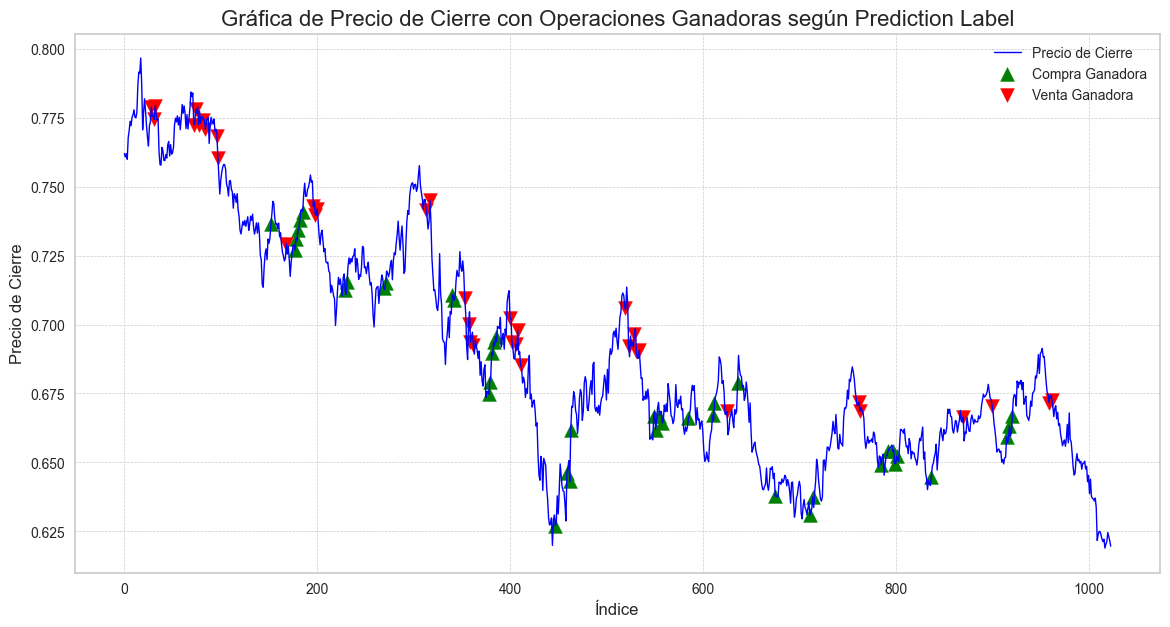

In [123]:
# Gráfica de los precios
plt.figure(figsize=(14, 7))
plt.plot(predictions['close'], label='Precio de Cierre', color='blue', linewidth=1)

# Señales de compra ganadoras basadas en prediction_label
winning_buy_signals = predictions[(predictions['buy_signal'] == 1) & (predictions['prediction_label'] == 'win')]
plt.scatter(winning_buy_signals.index, winning_buy_signals['close'], marker='^', color='green', label='Compra Ganadora', s=100)

# Señales de venta ganadoras basadas en prediction_label
winning_sell_signals = predictions[(predictions['sell_signal'] == -1) & (predictions['prediction_label'] == 'win')]
plt.scatter(winning_sell_signals.index, winning_sell_signals['close'], marker='v', color='red', label='Venta Ganadora', s=100)

# Etiquetas y personalización
plt.title('Gráfica de Precio de Cierre con Operaciones Ganadoras según Prediction Label', fontsize=16)
plt.xlabel('Índice', fontsize=12)
plt.ylabel('Precio de Cierre', fontsize=12)
plt.legend()
plt.grid(True, linestyle='--', linewidth=0.5)

# Mostrar la gráfica
plt.show()


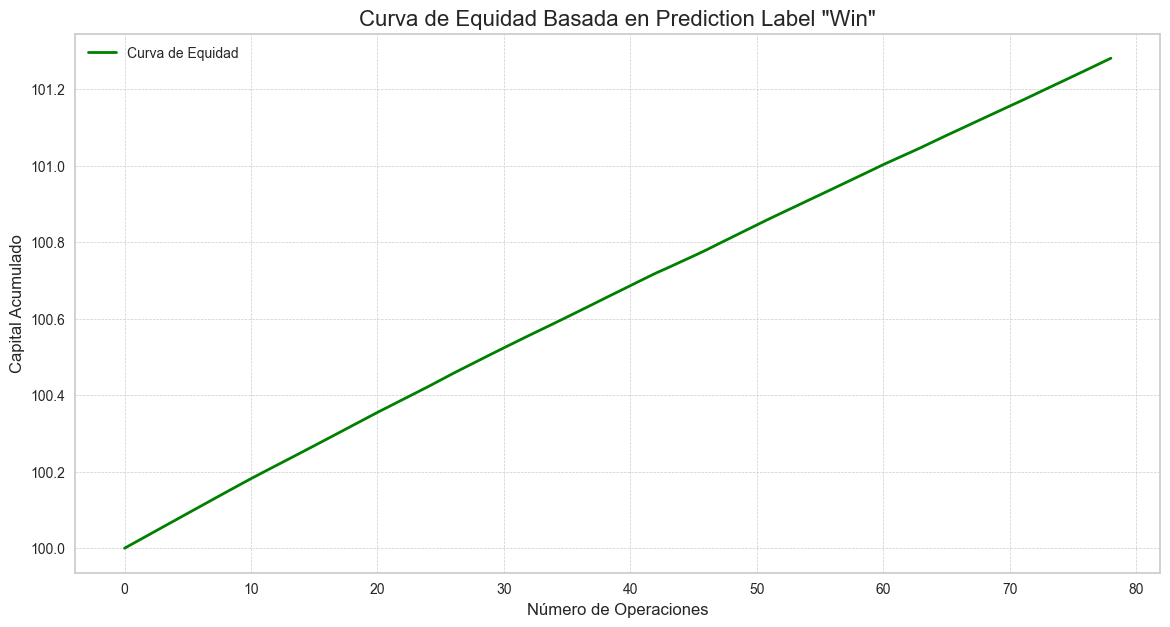

Capital final: 101.28


In [124]:
# Configuración inicial
initial_equity = 100  # Capital inicial
equity_curve = [initial_equity]
current_equity = initial_equity

# Filtrar las operaciones ganadoras basadas en prediction_label
winning_trades = predictions[predictions['prediction_label'] == 'win']

# Simular la curva de equidad usando el promedio de ganancia calculado
for idx, row in winning_trades.iterrows():
    entry_price = row['entry_price']
    if row['buy_signal'] == 1:  # Operación de compra
        profit = (average_gain_percentage / 100) * entry_price
    elif row['sell_signal'] == -1:  # Operación de venta
        profit = (average_gain_percentage / 100) * entry_price
    else:
        profit = 0  # No hay ganancia si no hay señal

    # Actualizar el capital
    current_equity += profit
    equity_curve.append(current_equity)

# Crear un DataFrame para la curva de equidad
equity_predictions = pd.DataFrame({
    'index': range(len(equity_curve)),
    'equity': equity_curve
})

# Graficar la curva de equidad
plt.figure(figsize=(14, 7))
plt.plot(equity_predictions['index'], equity_predictions['equity'], label='Curva de Equidad', color='green', linewidth=2)
plt.title('Curva de Equidad Basada en Prediction Label "Win"', fontsize=16)
plt.xlabel('Número de Operaciones', fontsize=12)
plt.ylabel('Capital Acumulado', fontsize=12)
plt.grid(True, linestyle='--', linewidth=0.5)
plt.legend()
plt.show()

# Mostrar el capital final
print(f"Capital final: {current_equity:.2f}")


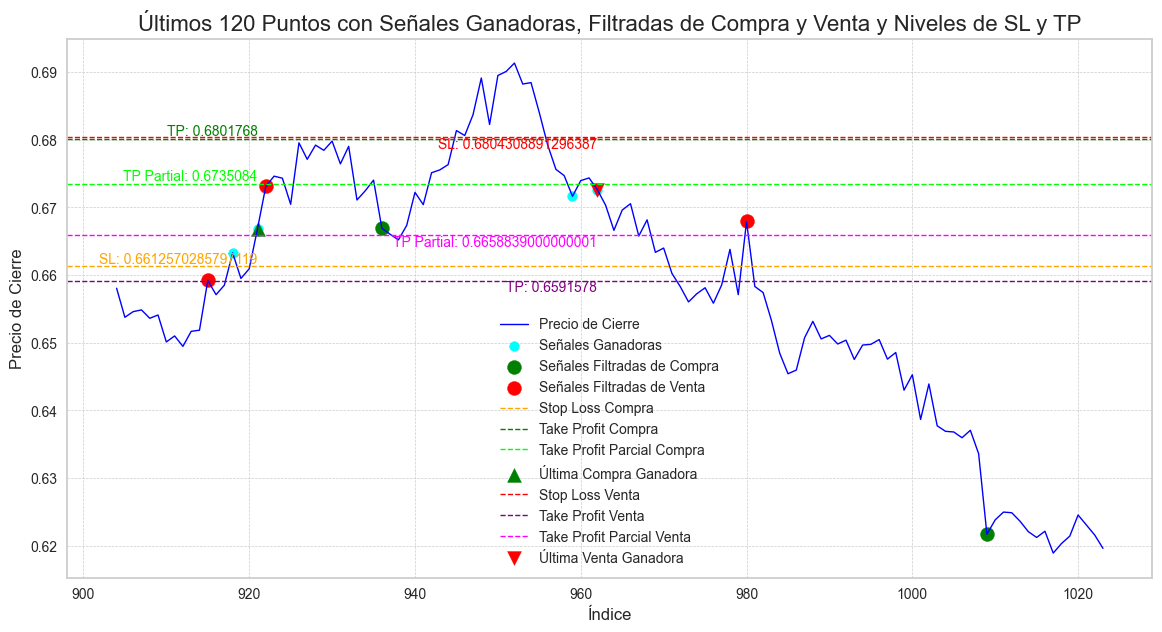

In [125]:
import pandas as pd
import matplotlib.pyplot as plt

# Filtrar los últimos 120 puntos
last_120_points = predictions.iloc[-120:]

# Identificar todas las señales ganadoras
all_winning_signals = last_120_points[last_120_points['prediction_label'] == 'win']

# Filtrar todas las señales filtradas de compra y venta
filtered_buy_signals = last_120_points[last_120_points['filtered_buy_signal'] == 1]
filtered_sell_signals = last_120_points[last_120_points['filtered_sell_signal'] == -1]

# Identificar la última señal de compra ganadora
last_buy_signal = all_winning_signals[(all_winning_signals['buy_signal'] == 1)].iloc[-1] \
    if not all_winning_signals[(all_winning_signals['buy_signal'] == 1)].empty else None

# Identificar la última señal de venta ganadora
last_sell_signal = all_winning_signals[(all_winning_signals['sell_signal'] == -1)].iloc[-1] \
    if not all_winning_signals[(all_winning_signals['sell_signal'] == -1)].empty else None

# Crear la gráfica
plt.figure(figsize=(14, 7))
plt.plot(last_120_points['close'], label='Precio de Cierre', color='blue', linewidth=1)

# Graficar todas las señales ganadoras
plt.scatter(all_winning_signals.index, all_winning_signals['close'], color='cyan', label='Señales Ganadoras', s=50)

# Graficar las señales de compra filtradas
plt.scatter(filtered_buy_signals.index, filtered_buy_signals['close'], color='green', label='Señales Filtradas de Compra', s=100)

# Graficar las señales de venta filtradas
plt.scatter(filtered_sell_signals.index, filtered_sell_signals['close'], color='red', label='Señales Filtradas de Venta', s=100)

# Graficar SL y TP para la última señal de compra
if last_buy_signal is not None:
    plt.axhline(y=last_buy_signal['stop_loss'], color='orange', linestyle='--', label='Stop Loss Compra', linewidth=1)
    plt.axhline(y=last_buy_signal['take_profit'], color='green', linestyle='--', label='Take Profit Compra', linewidth=1)
    plt.axhline(y=last_buy_signal['take_profit_partial'], color='lime', linestyle='--', label='Take Profit Parcial Compra', linewidth=1)
    plt.scatter(last_buy_signal.name, last_buy_signal['close'], marker='^', color='green', label='Última Compra Ganadora', s=100)

    # Anotaciones
    plt.text(last_buy_signal.name, last_buy_signal['stop_loss'], f"SL: {last_buy_signal['stop_loss']}", 
             color='orange', fontsize=10, ha='right', va='bottom')
    plt.text(last_buy_signal.name, last_buy_signal['take_profit'], f"TP: {last_buy_signal['take_profit']}", 
             color='green', fontsize=10, ha='right', va='bottom')
    plt.text(last_buy_signal.name, last_buy_signal['take_profit_partial'], f"TP Partial: {last_buy_signal['take_profit_partial']}", 
             color='lime', fontsize=10, ha='right', va='bottom')

# Graficar SL y TP para la última señal de venta
if last_sell_signal is not None:
    plt.axhline(y=last_sell_signal['stop_loss'], color='red', linestyle='--', label='Stop Loss Venta', linewidth=1)
    plt.axhline(y=last_sell_signal['take_profit'], color='purple', linestyle='--', label='Take Profit Venta', linewidth=1)
    plt.axhline(y=last_sell_signal['take_profit_partial'], color='magenta', linestyle='--', label='Take Profit Parcial Venta', linewidth=1)
    plt.scatter(last_sell_signal.name, last_sell_signal['close'], marker='v', color='red', label='Última Venta Ganadora', s=100)

    # Anotaciones
    plt.text(last_sell_signal.name, last_sell_signal['stop_loss'], f"SL: {last_sell_signal['stop_loss']}", 
             color='red', fontsize=10, ha='right', va='top')
    plt.text(last_sell_signal.name, last_sell_signal['take_profit'], f"TP: {last_sell_signal['take_profit']}", 
             color='purple', fontsize=10, ha='right', va='top')
    plt.text(last_sell_signal.name, last_sell_signal['take_profit_partial'], f"TP Partial: {last_sell_signal['take_profit_partial']}", 
             color='magenta', fontsize=10, ha='right', va='top')

# Etiquetas y personalización
plt.title('Últimos 120 Puntos con Señales Ganadoras, Filtradas de Compra y Venta y Niveles de SL y TP', fontsize=16)
plt.xlabel('Índice', fontsize=12)
plt.ylabel('Precio de Cierre', fontsize=12)
plt.legend()
plt.grid(True, linestyle='--', linewidth=0.5)

# Mostrar la gráfica
plt.show()


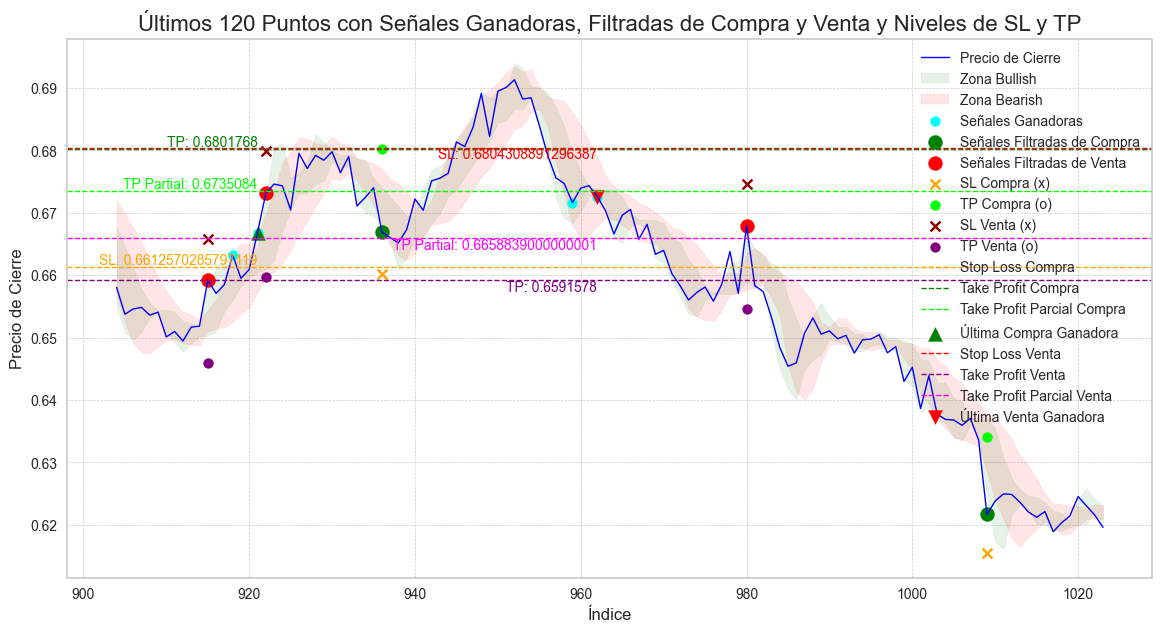

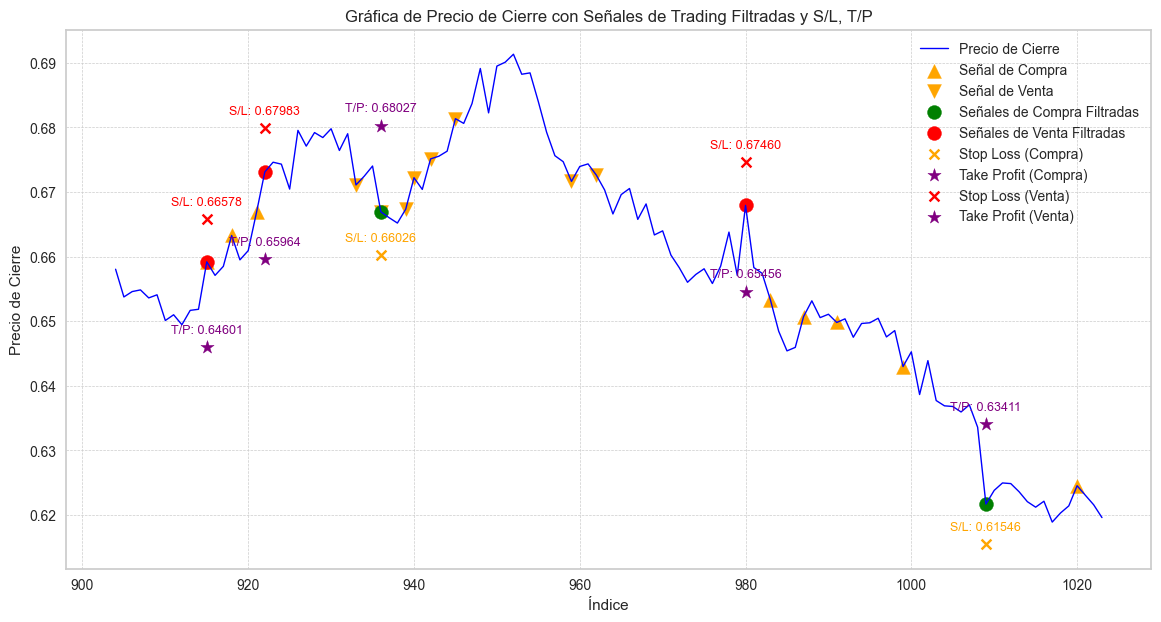

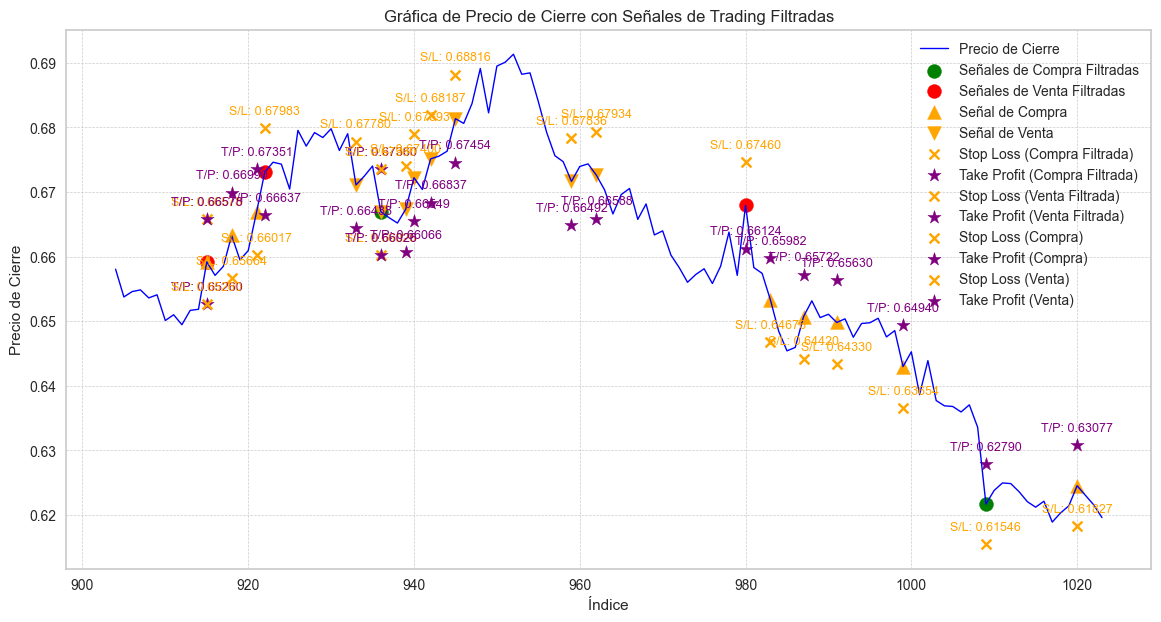

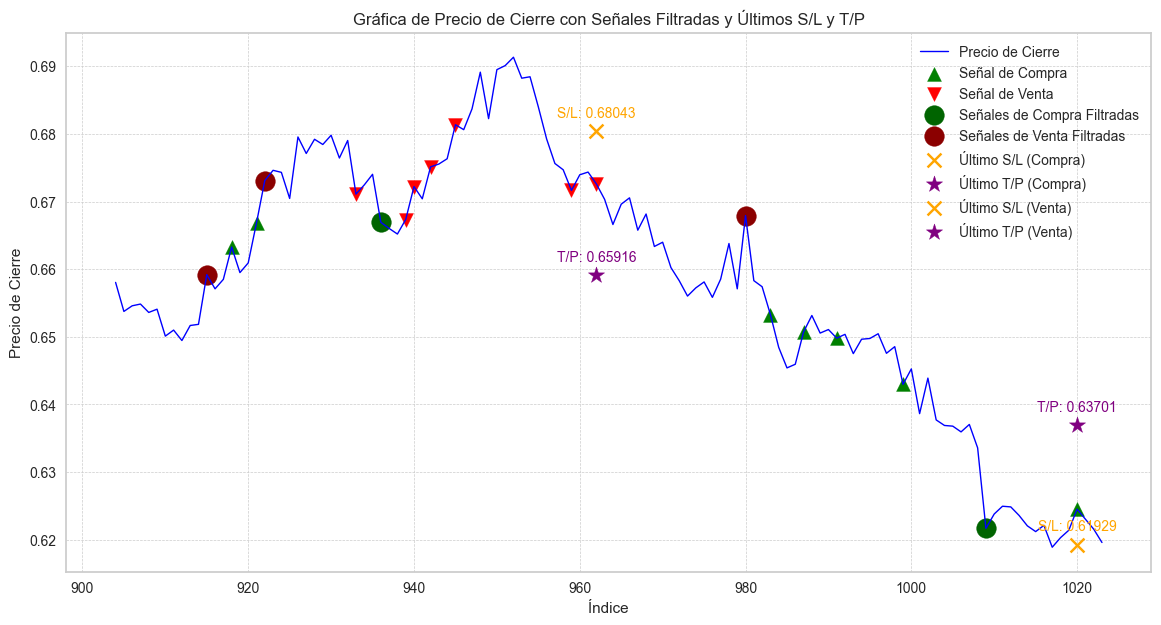

In [126]:
import pandas as pd
import matplotlib.pyplot as plt

# Filtrar los últimos 120 puntos
last_120_points = predictions.iloc[-120:]

# Identificar todas las señales ganadoras
all_winning_signals = last_120_points[last_120_points['prediction_label'] == 'win']

# Filtrar todas las señales filtradas de compra y venta
filtered_buy_signals = last_120_points[last_120_points['filtered_buy_signal'] == 1]
filtered_sell_signals = last_120_points[last_120_points['filtered_sell_signal'] == -1]

# Identificar la última señal de compra ganadora
last_buy_signal = all_winning_signals[(all_winning_signals['buy_signal'] == 1)].iloc[-1] \
    if not all_winning_signals[(all_winning_signals['buy_signal'] == 1)].empty else None

# Identificar la última señal de venta ganadora
last_sell_signal = all_winning_signals[(all_winning_signals['sell_signal'] == -1)].iloc[-1] \
    if not all_winning_signals[(all_winning_signals['sell_signal'] == -1)].empty else None

# Cálculo de SL y TP para señales filtradas de compra
filtered_buy_signals['stop_loss'] = filtered_buy_signals['close'] - (filtered_buy_signals['close'] * 0.01)
filtered_buy_signals['take_profit'] = filtered_buy_signals['close'] + (filtered_buy_signals['close'] * 0.02)

# Cálculo de SL y TP para señales filtradas de venta
filtered_sell_signals['stop_loss'] = filtered_sell_signals['close'] + (filtered_sell_signals['close'] * 0.01)
filtered_sell_signals['take_profit'] = filtered_sell_signals['close'] - (filtered_sell_signals['close'] * 0.02)

# Crear la gráfica
plt.figure(figsize=(14, 7))
plt.plot(last_120_points['close'], label='Precio de Cierre', color='blue', linewidth=1)

# Graficar las bandas bullish y bearish
# Rellenar las áreas entre las bandas bullish
plt.fill_between(
    last_120_points.index,
    last_120_points['bullish_lower_band'],
    last_120_points['bullish_upper_band'],
    color='green',
    alpha=0.1,
    label='Zona Bullish'
)

# Rellenar las áreas entre las bandas bearish
plt.fill_between(
    last_120_points.index,
    last_120_points['bearish_lower_band'],
    last_120_points['bearish_upper_band'],
    color='red',
    alpha=0.1,
    label='Zona Bearish'
)

# Graficar todas las señales ganadoras
plt.scatter(all_winning_signals.index, all_winning_signals['close'], color='cyan', label='Señales Ganadoras', s=50)

# Graficar las señales de compra filtradas
plt.scatter(filtered_buy_signals.index, filtered_buy_signals['close'], color='green', label='Señales Filtradas de Compra', s=100)

# Graficar las señales de venta filtradas
plt.scatter(filtered_sell_signals.index, filtered_sell_signals['close'], color='red', label='Señales Filtradas de Venta', s=100)

# Graficar SL y TP como 'x' y 'o' para las señales filtradas de compra
plt.scatter(filtered_buy_signals.index, filtered_buy_signals['stop_loss'], color='orange', label='SL Compra (x)', marker='x', s=50)
plt.scatter(filtered_buy_signals.index, filtered_buy_signals['take_profit'], color='lime', label='TP Compra (o)', marker='o', s=50)

# Graficar SL y TP como 'x' y 'o' para las señales filtradas de venta
plt.scatter(filtered_sell_signals.index, filtered_sell_signals['stop_loss'], color='darkred', label='SL Venta (x)', marker='x', s=50)
plt.scatter(filtered_sell_signals.index, filtered_sell_signals['take_profit'], color='purple', label='TP Venta (o)', marker='o', s=50)

# Graficar SL y TP para la última señal de compra
if last_buy_signal is not None:
    plt.axhline(y=last_buy_signal['stop_loss'], color='orange', linestyle='--', label='Stop Loss Compra', linewidth=1)
    plt.axhline(y=last_buy_signal['take_profit'], color='green', linestyle='--', label='Take Profit Compra', linewidth=1)
    plt.axhline(y=last_buy_signal['take_profit_partial'], color='lime', linestyle='--', label='Take Profit Parcial Compra', linewidth=1)
    plt.scatter(last_buy_signal.name, last_buy_signal['close'], marker='^', color='green', label='Última Compra Ganadora', s=100)

    # Anotaciones
    plt.text(last_buy_signal.name, last_buy_signal['stop_loss'], f"SL: {last_buy_signal['stop_loss']}", 
             color='orange', fontsize=10, ha='right', va='bottom')
    plt.text(last_buy_signal.name, last_buy_signal['take_profit'], f"TP: {last_buy_signal['take_profit']}", 
             color='green', fontsize=10, ha='right', va='bottom')
    plt.text(last_buy_signal.name, last_buy_signal['take_profit_partial'], f"TP Partial: {last_buy_signal['take_profit_partial']}", 
             color='lime', fontsize=10, ha='right', va='bottom')

# Graficar SL y TP para la última señal de venta
if last_sell_signal is not None:
    plt.axhline(y=last_sell_signal['stop_loss'], color='red', linestyle='--', label='Stop Loss Venta', linewidth=1)
    plt.axhline(y=last_sell_signal['take_profit'], color='purple', linestyle='--', label='Take Profit Venta', linewidth=1)
    plt.axhline(y=last_sell_signal['take_profit_partial'], color='magenta', linestyle='--', label='Take Profit Parcial Venta', linewidth=1)
    plt.scatter(last_sell_signal.name, last_sell_signal['close'], marker='v', color='red', label='Última Venta Ganadora', s=100)

    # Anotaciones
    plt.text(last_sell_signal.name, last_sell_signal['stop_loss'], f"SL: {last_sell_signal['stop_loss']}", 
             color='red', fontsize=10, ha='right', va='top')
    plt.text(last_sell_signal.name, last_sell_signal['take_profit'], f"TP: {last_sell_signal['take_profit']}", 
             color='purple', fontsize=10, ha='right', va='top')
    plt.text(last_sell_signal.name, last_sell_signal['take_profit_partial'], f"TP Partial: {last_sell_signal['take_profit_partial']}", 
             color='magenta', fontsize=10, ha='right', va='top')

# Etiquetas y personalización
plt.title('Últimos 120 Puntos con Señales Ganadoras, Filtradas de Compra y Venta y Niveles de SL y TP', fontsize=16)
plt.xlabel('Índice', fontsize=12)
plt.ylabel('Precio de Cierre', fontsize=12)
plt.legend()
plt.grid(True, linestyle='--', linewidth=0.5)

plot_signals_with_sl_tp(df, take_profit_percentage=0.02, stop_loss_percentage=0.01)
plot_filtered_signals_with_sl_tp(df, take_profit_percentage=0.01, stop_loss_percentage=0.01)
plot_signals_with_sl_tp2(df)

# Mostrar la gráfica
plt.show()
